In [65]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import string
import re    
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from textblob import TextBlob
from nltk import ngrams
from collections import Counter
from nltk import ngrams, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Importing CSV File

In [3]:
df = pd.read_csv("trainx.csv")

In [4]:
df.head()

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [6]:
nrow_train=df.shape[0]
print("        Train")
print("Rows :",nrow_train)

        Train
Rows : 159571


# Dataset Information

* **Dataset Overview:** The dataset contains a total of 159,571 records. Each record includes information about a comment posted online, with attributes such as an identifier (id) and the actual text content of the comment **(comment_text)**.


* **Toxicity Labels:** The dataset includes six binary target variables (toxic, severe_toxic, obscene, threat, insult, identity_hate), indicating the presence or absence of specific types of toxic content within the comments. These labels provide insights into different forms of harmful or offensive language.


* **Class Distribution:** The dataset demonstrates varying class distribution for each toxicity label. The attributes toxic, severe_toxic, obscene, threat, insult, and identity_hate have corresponding non-null integer values, indicating the frequency of each type of toxicity within the comments. This distribution of labels is essential to consider when building and evaluating multi-label classification models for toxicity prediction.

# Sample comment

In [7]:
df['comment_text'][7]

"Your vandalism to the Matt Shirvington article has been reverted.  Please don't do it again, or you will be banned."

# Data Visulizing and EDA

<AxesSubplot:>

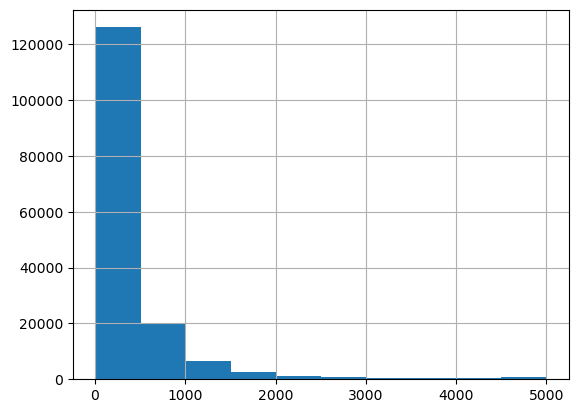

In [8]:
lens = df.comment_text.str.len()
lens.hist()

In [9]:
x=df.iloc[:,2:].sum()
rowsums=df.iloc[:,2:].sum(axis=1)
df['clean']=(rowsums==0)
df['clean'].sum()
print("Total comments = ",len(df))
print("Total clean comments = ",df['clean'].sum())
print("Total tags =",x.sum())

Total comments =  159571
Total clean comments =  143346
Total tags = 35098


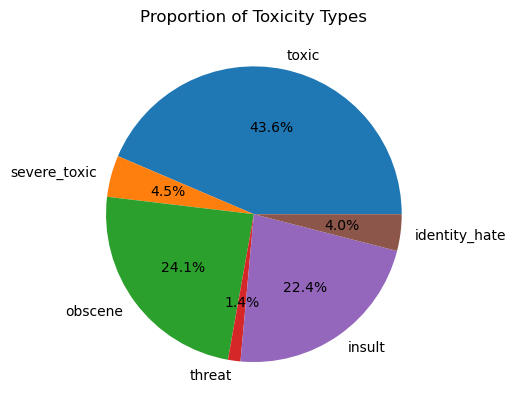

In [10]:
toxic_counts = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()
plt.pie(toxic_counts, labels=toxic_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Toxicity Types')
plt.show()

### Observation 

1. **Class Imbalance:**
        The dataset exhibits a notable class imbalance, with the highest proportion of comments falling into the "toxic" category at 43.6%. This indicates that a substantial portion of the comments possess toxic content, while other categories such as "obscene," "insult," and "severe toxic" are also prevalent, though to varying degrees.

2. **Specific Toxic Categories:**
        Among the specific categories of toxic comments, "obscene" and "insult" represent approximately 24.1% and 22.4% of the dataset, respectively. This highlights the prevalence of offensive and insulting content within the comments. Additionally, "identity hate" and "severe toxic" categories contribute to around 4% and 4.5% of the dataset, respectively, suggesting the presence of targeted harmful behavior.

3. **Less Frequent Categories:**
        The dataset also includes less frequent categories of toxic comments, with "threat" being the least prevalent at 1.4%. This indicates that explicit threats within comments are relatively rare compared to other forms of toxicity. It's essential to consider these variations in distribution when designing and evaluating multi-label classification models for toxicity prediction.

In [11]:
print("Check for missing values in Train dataset")
null_check=df.isnull().sum()
print(null_check)
print("filling NA with \"unknown\"")
df["comment_text"].fillna("unknown", inplace=True)

Check for missing values in Train dataset
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
clean            0
dtype: int64
filling NA with "unknown"


In [12]:
# Get comments for the "toxic" label
toxic_comments = df[df['toxic'] == 1]['comment_text'].tolist()

# Get comments for the "severe_toxic" label
severe_toxic_comments = df[df['severe_toxic'] == 1]['comment_text'].tolist()

# Get comments for the "obscene" label
obscene_comments = df[df['obscene'] == 1]['comment_text'].tolist()

# Get comments for the "threat" label
threat_comments = df[df['threat'] == 1]['comment_text'].tolist()

# Get comments for the "insult" label
insult_comments = df[df['insult'] == 1]['comment_text'].tolist()

# Get comments for the "identity_hate" label
identity_hate_comments = df[df['identity_hate'] == 1]['comment_text'].tolist()

# Get clean comments
clean_comments = df[df['clean'] == True]['comment_text'].tolist()

# Count the number of comments for each label
num_toxic_comments = len(toxic_comments)
num_severe_toxic_comments = len(severe_toxic_comments)
num_obscene_comments = len(obscene_comments)
num_threat_comments = len(threat_comments)
num_insult_comments = len(insult_comments)
num_identity_hate_comments = len(identity_hate_comments)
num_clean_comments = len(clean_comments)

# Print the counts
print(f"Number of Toxic Comments: {num_toxic_comments}")
print(f"Number of Severe Toxic Comments: {num_severe_toxic_comments}")
print(f"Number of Obscene Comments: {num_obscene_comments}")
print(f"Number of Threat Comments: {num_threat_comments}")
print(f"Number of Insult Comments: {num_insult_comments}")
print(f"Number of Identity Hate Comments: {num_identity_hate_comments}")
print(f"Number of Clean Comments: {num_clean_comments}")


Number of Toxic Comments: 15294
Number of Severe Toxic Comments: 1595
Number of Obscene Comments: 8449
Number of Threat Comments: 478
Number of Insult Comments: 7877
Number of Identity Hate Comments: 1405
Number of Clean Comments: 143346


C:\Users\monil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


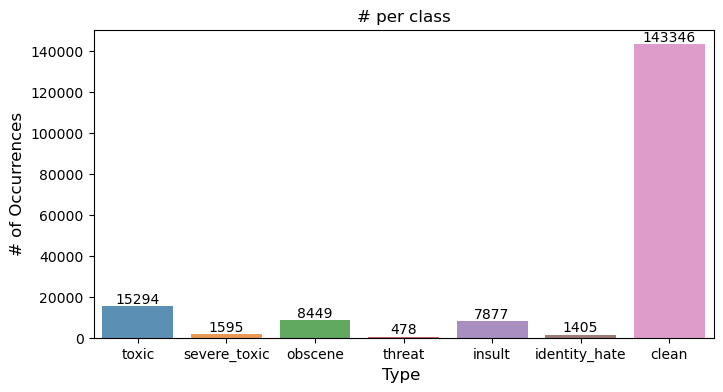

In [13]:
x=df.iloc[:,2:].sum()
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

* The dataset comprises a total of **159,571 comments**, with distinct categories of toxicity identified. Notably, there are **15,294** comments labeled as "Toxic," **1,595** labeled as "Severe Toxic," **8,449** labeled as "Obscene," **478** labeled as "Threat," **7,877** labeled as "Insult," and **1,405** labeled as "Identity Hate."

* Additionally, the dataset contains a significant portion of non-toxic comments, with **143,346** comments categorized as "Clean." This indicates that the majority of comments are devoid of explicit toxic content, underscoring the importance of addressing and predicting various forms of toxicity while considering the imbalanced nature of the dataset.

C:\Users\monil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


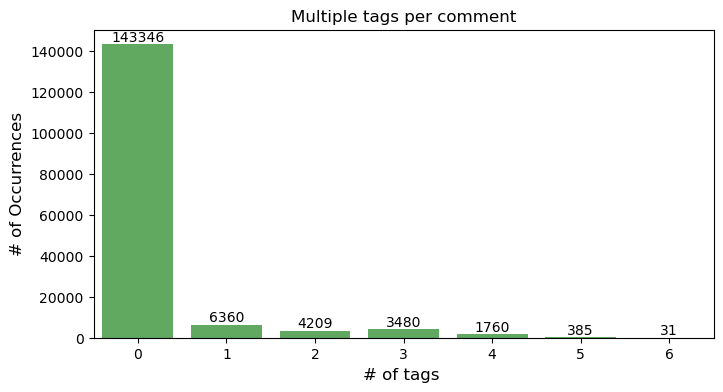

In [14]:
x=rowsums.value_counts()

#plot
color = sns.color_palette()
plt.figure(figsize=(8,4))
ax = sns.barplot(x.index, x.values, alpha=0.8,color=color[2])
plt.title("Multiple tags per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of tags ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

**The dataset encompasses a diverse range of 159,571 comments, with varying degrees of toxicity marked by multiple tag combinations.**

* The highest count is observed in comments devoid of any toxic attributes, totaling 143,346 instances.
* There are 6,360 comments labeled with a single tag, indicating a singular form of toxicity within those comments.
* Approximately 4,209 comments are associated with a combination of three tags, highlighting instances of multi-dimensional toxicity.
* Another 3,480 comments exhibit two distinct toxic attributes, contributing to a nuanced understanding of toxicity within discussions.
* Further, 1,760 comments possess four tags, showcasing a complex interplay of multiple toxic elements.
* 385 comments carry five tags, suggesting an intricate convergence of various forms of harmful content.
* In a subset of the dataset, 31 comments display all six tags concurrently, signifying a comprehensive range of toxic attributes.

<AxesSubplot:>

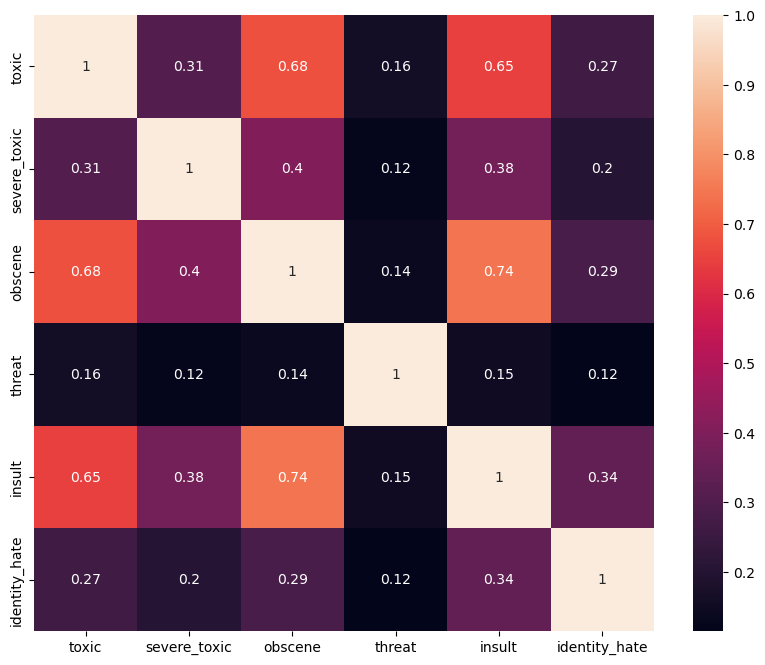

In [15]:
temp_df=df.iloc[:,2:-1]
# filter temp by removing clean comments
# temp_df=temp_df[~train.clean]

corr=temp_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

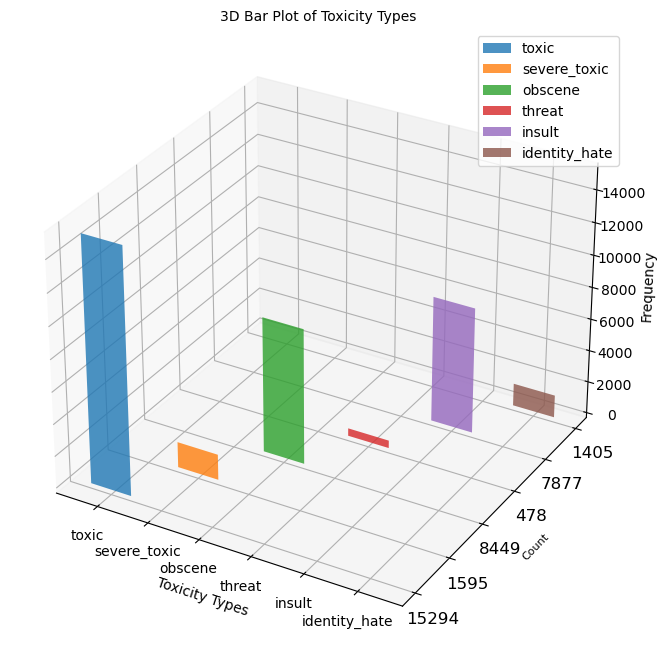

In [16]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

toxicity_types = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Calculate the counts of each toxicity type
toxicity_counts = df[toxicity_types].sum()

for i, toxicity_type in enumerate(toxicity_types):
    ax.bar(toxicity_type, toxicity_counts[toxicity_type], zs=i, zdir='y', alpha=0.8, label=toxicity_type,)

ax.set_xlabel('Toxicity Types',fontsize=10)
ax.set_ylabel('Count',fontsize=8)
ax.set_zlabel('Frequency',fontsize=10)
ax.set_title('3D Bar Plot of Toxicity Types',fontsize=10)
ax.set_yticks(range(len(toxicity_types)),fontsize=8)
ax.set_yticklabels(toxicity_counts,fontsize=12)

plt.legend()
plt.show()

# Some Observation from Dataset

### Imbalance in Toxicity
* The dataset reveals a significant class imbalance, with approximately **89.8%** of comments categorized as **"clean."** This distribution underscores the challenge of accurately identifying and addressing the relatively smaller fraction of toxic comments, highlighting the need for effective content moderation strategies.

### Predominant Toxic Categories
* Among the labeled toxic comments, **"toxic"** and **"obscene"** are the most prevalent categories, constituting around **9.6%** and **5.3%** of the total dataset, respectively. This suggests that offensive and inappropriate language are common forms of toxicity within the comments.

### Rare Severe Toxicity 
* The **"severe_toxic"** category is notably underrepresented, encompassing only approximately **0.6%** of the dataset. This rarity indicates that the most severe and aggressive forms of toxic behavior, such as personal attacks and threats, are infrequent within the discussions.

### Identity Hate Dynamics
* Comments labeled as **"identity_hate"** account for approximately **0.9%** of the dataset, signaling challenges in accurately detecting toxicity related to identity and discrimination. This underscores the complex nature of recognizing subtle and nuanced forms of harmful content.

# Example comments

In [17]:
print("Toxic:")
print(df[df.toxic==1].iloc[1,1])

Toxic:
Hey... what is it..
@ | talk .
What is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?

Ask Sityush to clean up his behavior than issue me nonsensical warnings...


In [18]:
print("Severe toxic:")
print(df[df.severe_toxic==1].iloc[1,1])

Severe toxic:
Stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell!


In [19]:
print("Obscene:")
print(df[df.obscene==1].iloc[16,1])

Obscene:
this user is such a worthless goddamn faggot fuck you faggot


In [20]:
print("Threat:")
print(df[df.threat==1].iloc[20,1])

Threat:
Wtf, Why You deleting Maashel? Bad things will happen to you now.


In [21]:
print("Insult:")
print(df[df.insult==1].iloc[31,1])

Insult:
HELLO 

You disgrace to humanity. Stop wasting valuable Internet resources (your killing the fucking planet) and throw out your PC. PS it's like 3am what the fark kinda life do you have on Wikipedia 24/7. A VERY SAD AND LONELY ONE LOL. Life's too short find something better to do


In [22]:
print("Identity Hate:")
print(df[df.identity_hate==1].iloc[31,1])

Identity Hate:
Dumb Niggaz 

Yall Niggas are dumb.Sean Kingston never played biggie.I was joking around dumbfucks.


In [23]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
clean            0
dtype: int64

# Feature engineering and data text-preprocessing

In [24]:
def tokenize_text(text):
    return word_tokenize(text)

def lowercase_text(text):
    return text.lower()

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token not in stop_words]

def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)


def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

def preprocess_text(column):
    column = column.apply(lowercase_text)
    column = column.apply(remove_punctuation)
    column = column.apply(tokenize_text)
    column = column.apply(remove_stopwords)
    column = column.apply(lemmatize_text)
    return column

In [25]:
df['unprocessed_comment'] = df['comment_text']
df["comment_text"] = preprocess_text(df["comment_text"])

In [26]:
stop_words = set(stopwords.words('english'))
df['count_sent']=df["unprocessed_comment"].apply(lambda x: len(re.findall("\n",str(x)))+1)

df['count_word']=df["unprocessed_comment"].apply(lambda x: len(str(x).split()))

df['count_unique_word']=df["unprocessed_comment"].apply(lambda x: len(set(str(x).split())))

df['count_letters']=df["unprocessed_comment"].apply(lambda x: len(str(x)))

df['word_unique_percent']=df['count_unique_word']*100/df['count_word']

df["count_punctuations"] = df.unprocessed_comment.apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

df["count_words_upper"] = df.unprocessed_comment.apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

df["count_words_title"] = df.unprocessed_comment.apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

df["count_stopwords"] = df.unprocessed_comment.apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

df["mean_word_len"] = df.comment_text.apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [27]:
df

id                                       comment_text  \
0       0000997932d777bf  [explanation, edits, made, username, hardcore,...   
1       000103f0d9cfb60f  [daww, match, background, colour, im, seemingl...   
2       000113f07ec002fd  [hey, man, im, really, trying, edit, war, guy,...   
3       0001b41b1c6bb37e  [cant, make, real, suggestion, improvement, wo...   
4       0001d958c54c6e35         [sir, hero, chance, remember, page, thats]   
...                  ...                                                ...   
159566  ffe987279560d7ff  [second, time, asking, view, completely, contr...   
159567  ffea4adeee384e90  [ashamed, horrible, thing, put, talk, page, 12...   
159568  ffee36eab5c267c9  [spitzer, umm, there, actual, article, prostit...   
159569  fff125370e4aaaf3  [look, like, actually, put, speedy, first, ver...   
159570  fff46fc426af1f9a  [really, dont, think, understand, came, idea, ...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  clean  \
0           0             0        0       0       0              0   True   
1           0             0        0       0       0              0   True   
2           0             0        0       0       0              0   True   
3           0             0        0       0       0              0   True   
4           0             0        0       0       0              0   True   
...       ...           ...      ...     ...     ...            ...    ...   
159566      0             0        0       0       0              0   True   
159567      0             0        0       0       0              0   True   
159568      0             0        0       0       0              0   True   
159569      0             0        0       0       0              0   True   
159570      0             0        0       0       0              0   True   

                                      unprocessed_comment  count_sent  \
0       Explanation\nWhy the edits made under my usern...           2   
1       D'aww! He matches this background colour I'm s...           1   
2       Hey man, I'm really not trying to edit war. It...           1   
3       "\nMore\nI can't make any real suggestions on ...           5   
4       You, sir, are my hero. Any chance you remember...           1   
...                                                   ...         ...   
159566  ":::::And for the second time of asking, when ...           3   
159567  You should be ashamed of yourself \n\nThat is ...           3   
159568  Spitzer \n\nUmm, theres no actual article for ...           3   
159569  And it looks like it was actually you who put ...           1   
159570  "\nAnd ... I really don't think you understand...           2   

        count_word  count_unique_word  count_letters  word_unique_percent  \
0               43                 41            264            95.348837   
1               17                 17            112           100.000000   
2               42                 39            233            92.857143   
3              113                 82            622            72.566372   
4               13                 13             67           100.000000   
...            ...                ...            ...                  ...   
159566          47                 44            295            93.617021   
159567          18                 18             99           100.000000   
159568          12                 12             81           100.000000   
159569          25                 23            116            92.000000   
159570          36                 32            189            88.888889   

        count_punctuations  count_words_upper  count_words_title  \
0                       10                  2                 11   
1                       12                  1                  3   
2                        6                  0                  2   
3                       21                  5                 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159571 non-null  object 
 1   comment_text         159571 non-null  object 
 2   toxic                159571 non-null  int64  
 3   severe_toxic         159571 non-null  int64  
 4   obscene              159571 non-null  int64  
 5   threat               159571 non-null  int64  
 6   insult               159571 non-null  int64  
 7   identity_hate        159571 non-null  int64  
 8   clean                159571 non-null  bool   
 9   unprocessed_comment  159571 non-null  object 
 10  count_sent           159571 non-null  int64  
 11  count_word           159571 non-null  int64  
 12  count_unique_word    159571 non-null  int64  
 13  count_letters        159571 non-null  int64  
 14  word_unique_percent  159571 non-null  float64
 15  count_punctuation

C:\Users\monil\AppData\Local\Temp\ipykernel_26088\405586251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_sent'].loc[df['count_sent']>15] = 15
C:\Users\monil\AppData\Local\Temp\ipykernel_26088\405586251.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_word'].loc[df['count_word']>300] = 300


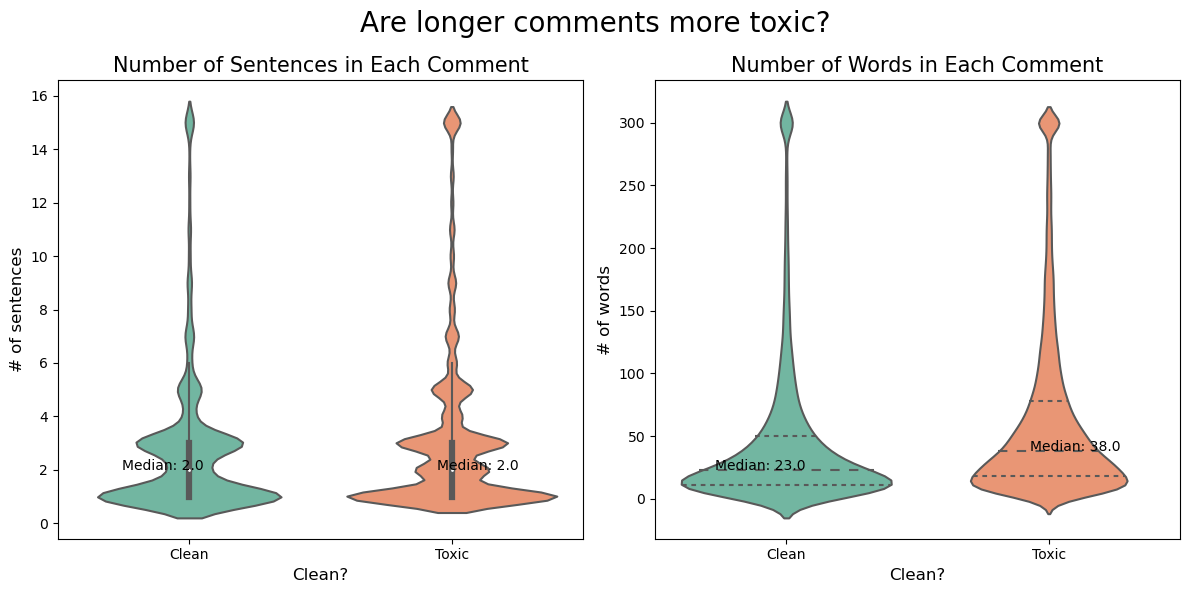

In [29]:
df['count_sent'].loc[df['count_sent']>15] = 15 
colors = ['#66c2a5', '#fc8d62']
plt.figure(figsize=(12, 6))

# Sentences subplot
plt.subplot(121)
plt.suptitle("Are longer comments more toxic?", fontsize=20)
sns.violinplot(y='count_sent', x='clean', data=df, split=True, palette=colors)
plt.xlabel('Clean?', fontsize=12)
plt.ylabel('# of sentences', fontsize=12)
plt.title("Number of Sentences in Each Comment", fontsize=15)
plt.xticks(ticks=[0, 1], labels=['Clean', 'Toxic'])

# Annotate the violin plots with labels
for i, category in enumerate(['Clean', 'Toxic']):
    count_data = df[df['clean'] == i]['count_sent']
    x_offset = -0.1 if i == 0 else 0.1
    plt.text(i + x_offset, count_data.median(), f'Median: {count_data.median():.1f}', color='black', ha='center')

# Words subplot
df['count_word'].loc[df['count_word']>300] = 300 
plt.subplot(122)
sns.violinplot(y='count_word', x='clean', data=df, split=True, inner="quart", palette=colors)
plt.xlabel('Clean?', fontsize=12)
plt.ylabel('# of words', fontsize=12)
plt.title("Number of Words in Each Comment", fontsize=15)
plt.xticks(ticks=[0, 1], labels=['Clean', 'Toxic'])

# Annotate the violin plots with labels
for i, category in enumerate(['Clean', 'Toxic']):
    count_data = df[df['clean'] == i]['count_word']
    x_offset = -0.1 if i == 0 else 0.1
    plt.text(i + x_offset, count_data.median(), f'Median: {count_data.median():.1f}', color='black', ha='center')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

### Sentence Count and Toxicity 
* The first violin plot depicts the distribution of sentence counts in comments, separated by their toxicity classification. Interestingly, both clean and toxic comments show a similar median number of sentences. This suggests that the length of sentences might not be a strong discriminator for toxicity. Clean comments, however, exhibit a slightly broader distribution, hinting at the potential for more varied content in non-toxic discussions.

### Word Count and Toxicity
* In the second violin plot, the distribution of word counts in comments is examined. Notably, clean comments display a more compact distribution with a slightly lower **median word count of 23 compared to toxic comments**, which have a higher median word count of 38. Additionally, the broader spread of word counts in toxic comments suggests that they can span a wider range of lengths. This variation in word counts within toxic comments may indicate that the toxic content encompasses a diverse spectrum of expressions and subjects.

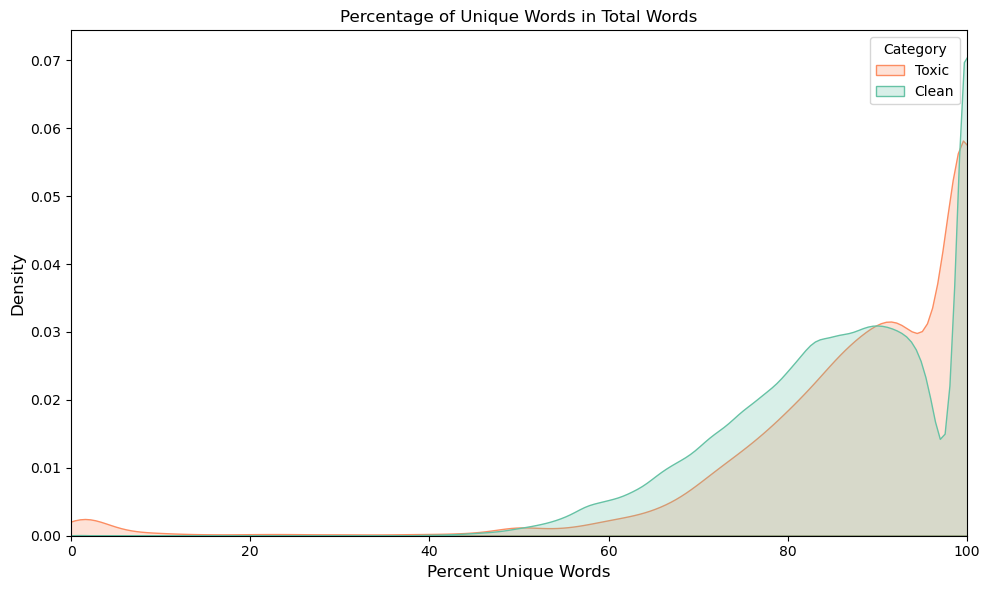

In [30]:
import matplotlib.gridspec as gridspec
import numpy as np

plt.figure(figsize=(10, 6))

# Plot the KDE distribution of percentage of unique words
plt.title("Percentage of Unique Words in Total Words")
ax = sns.kdeplot(df[df.clean == 0].word_unique_percent, label="Toxic", shade=True, color=colors[1])
ax = sns.kdeplot(df[df.clean == 1].word_unique_percent, label="Clean", shade=True, color=colors[0])
plt.legend(title='Category')
plt.ylabel('Density', fontsize=12)
plt.xlabel('Percent Unique Words', fontsize=12)

# Set x-axis limits to 0 to 100
plt.xlim(0, 100)

# Fine-tune the layout
plt.tight_layout()
plt.show()


### Distinct Linguistic Patterns: 
* The KDE distribution plot highlights that clean comments tend to exhibit a higher percentage of unique words, reflecting a diverse and varied vocabulary. In contrast, toxic comments often display a broader spread and lower concentration of unique words, potentially indicating repetitive language patterns associated with toxicity.

### Potential Discriminative Feature: 
* The separation between clean and toxic comment distributions based on the percentage of unique words suggests that this feature could serve as a valuable linguistic indicator for distinguishing between the two categories. The varying shapes of the distributions underscore the potential of this feature to capture nuances in language usage. 

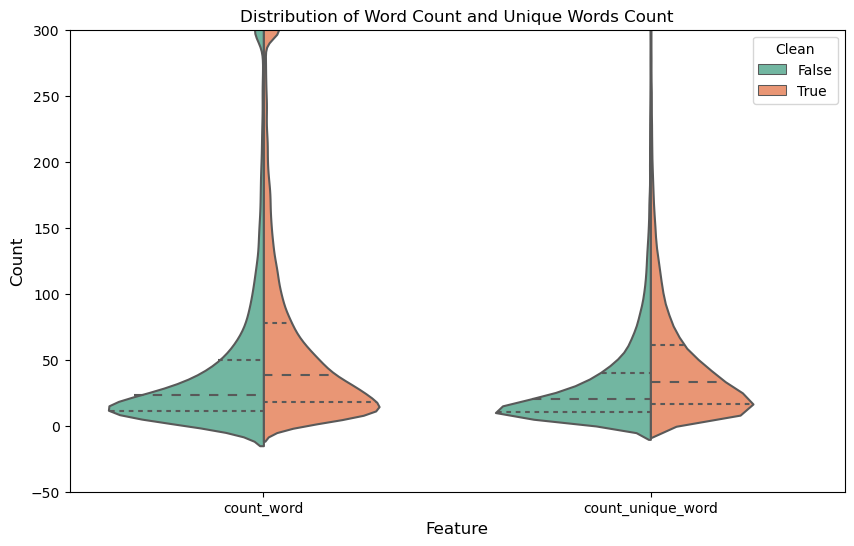

In [31]:
plt.figure(figsize=(10, 6))
temp_df = pd.melt(df, value_vars=['count_word', 'count_unique_word'], id_vars='clean')
sns.violinplot(x='variable', y='value', hue='clean', data=temp_df, split=True, inner='quartile', palette=colors)
plt.title("Distribution of Word Count and Unique Words Count")
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.ylim(-50, 300)
plt.legend(title='Clean', loc='upper right')

## Observation
* The violin plot effectively illustrates the distribution of word count and unique word count features across the 'clean' categories, allowing for a quick comparison of the distribution shapes and central tendencies between clean and non-clean samples. The use of quartiles and the 'inner' parameter set to 'quartile' in the violin plot provides insight into the data's spread while maintaining visual clarity.

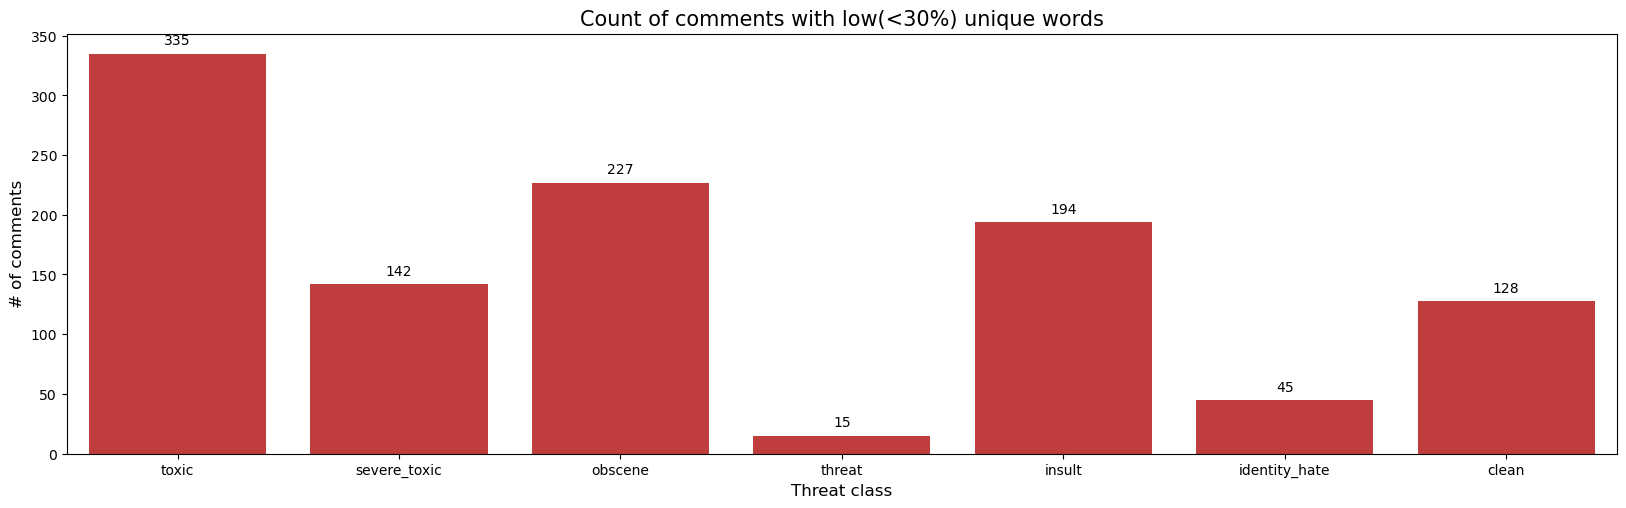

In [32]:
spammers=df[df['word_unique_percent']<30]
plt.figure(figsize=(20, 12))
x=spammers.iloc[:,2:9].sum()
plt.subplot2grid((2,2),(1,0),colspan=2)
plt.title("Count of comments with low(<30%) unique words",fontsize=15)
ax=sns.barplot(x=x.index, y=x.values,color=color[3])

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.xlabel('Threat class', fontsize=12)
plt.ylabel('# of comments', fontsize=12)
plt.show()

In [33]:
clean_comments = df[df['clean'] == 'True']['comment_text']
toxic_comments = df[df['clean'] == 'False']['comment_text']

Text(0, 0.5, 'Unigrams')

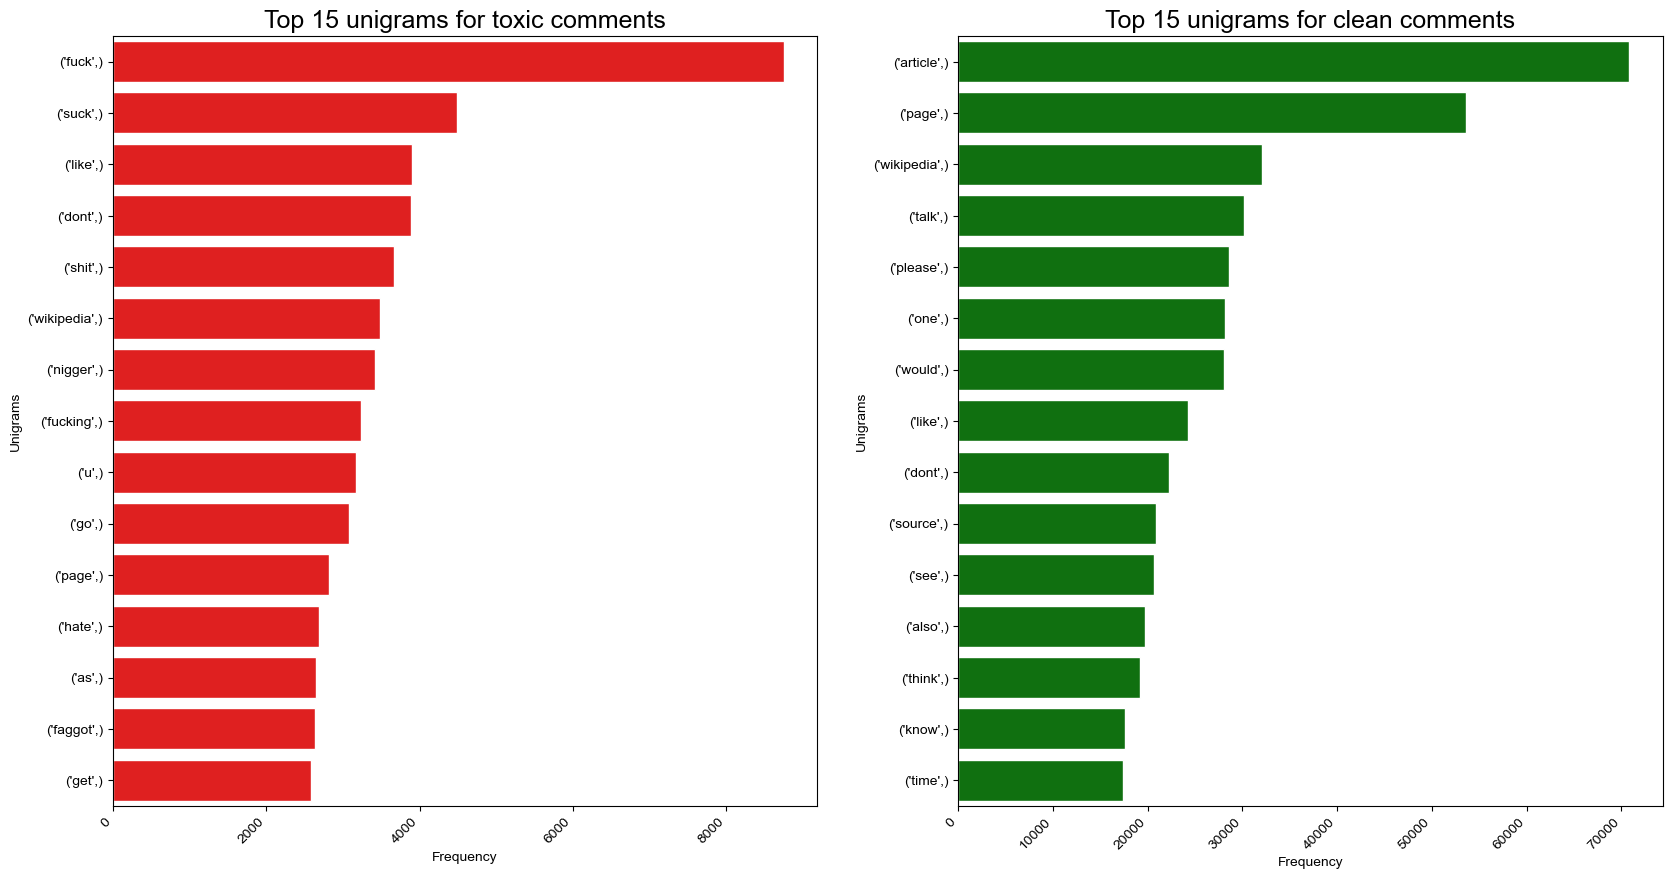

In [34]:
# Sample clean and toxic comments (replace with your actual data)
clean_comments = df[df['clean'] == 1]['comment_text']
toxic_comments = df[df['clean'] == 0]['comment_text']

# Combine clean and toxic words
clean_words = ' '.join([' '.join(comment_text) for comment_text in clean_comments])
toxic_words = ' '.join([' '.join(comment_text) for comment_text in toxic_comments])

# Generate unigrams using ngrams
unigrams_clean = ngrams(word_tokenize(clean_words), 1)
unigrams_toxic = ngrams(word_tokenize(toxic_words), 1)

# Count unigram frequencies
frequency_clean = Counter(unigrams_clean)
frequency_toxic = Counter(unigrams_toxic)

# Create DataFrames for top unigrams
df_negative = pd.DataFrame(frequency_toxic.most_common(15), columns=['Unigram', 'Frequency'])
df_positive = pd.DataFrame(frequency_clean.most_common(15), columns=['Unigram', 'Frequency'])

# Barplot that shows the top 20 unigrams
plt.rcParams['figure.figsize'] = [20, 10]
fig, ax = plt.subplots(1, 2)
sns.set(font_scale = 1.5, style = 'whitegrid')


neg = sns.barplot(x='Frequency', y='Unigram', data=df_negative, color='red', ax=ax[0])
pos = sns.barplot(x='Frequency', y='Unigram', data=df_positive, color='green', ax=ax[1])

plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45, ha="right")
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45, ha="right")

# Setting axes labels and titles
neg.set_title("Top 15 unigrams for toxic comments")
pos.set_title("Top 15 unigrams for clean comments")
neg.set_ylabel("Unigrams")
pos.set_ylabel("Unigrams")


### Review 
* Some censored word are in the top of the unigrams for toxic comments where 'article','page' and 'wikipedia' are the top unigrams in clean comments  

Text(0, 0.5, 'Bigrams')

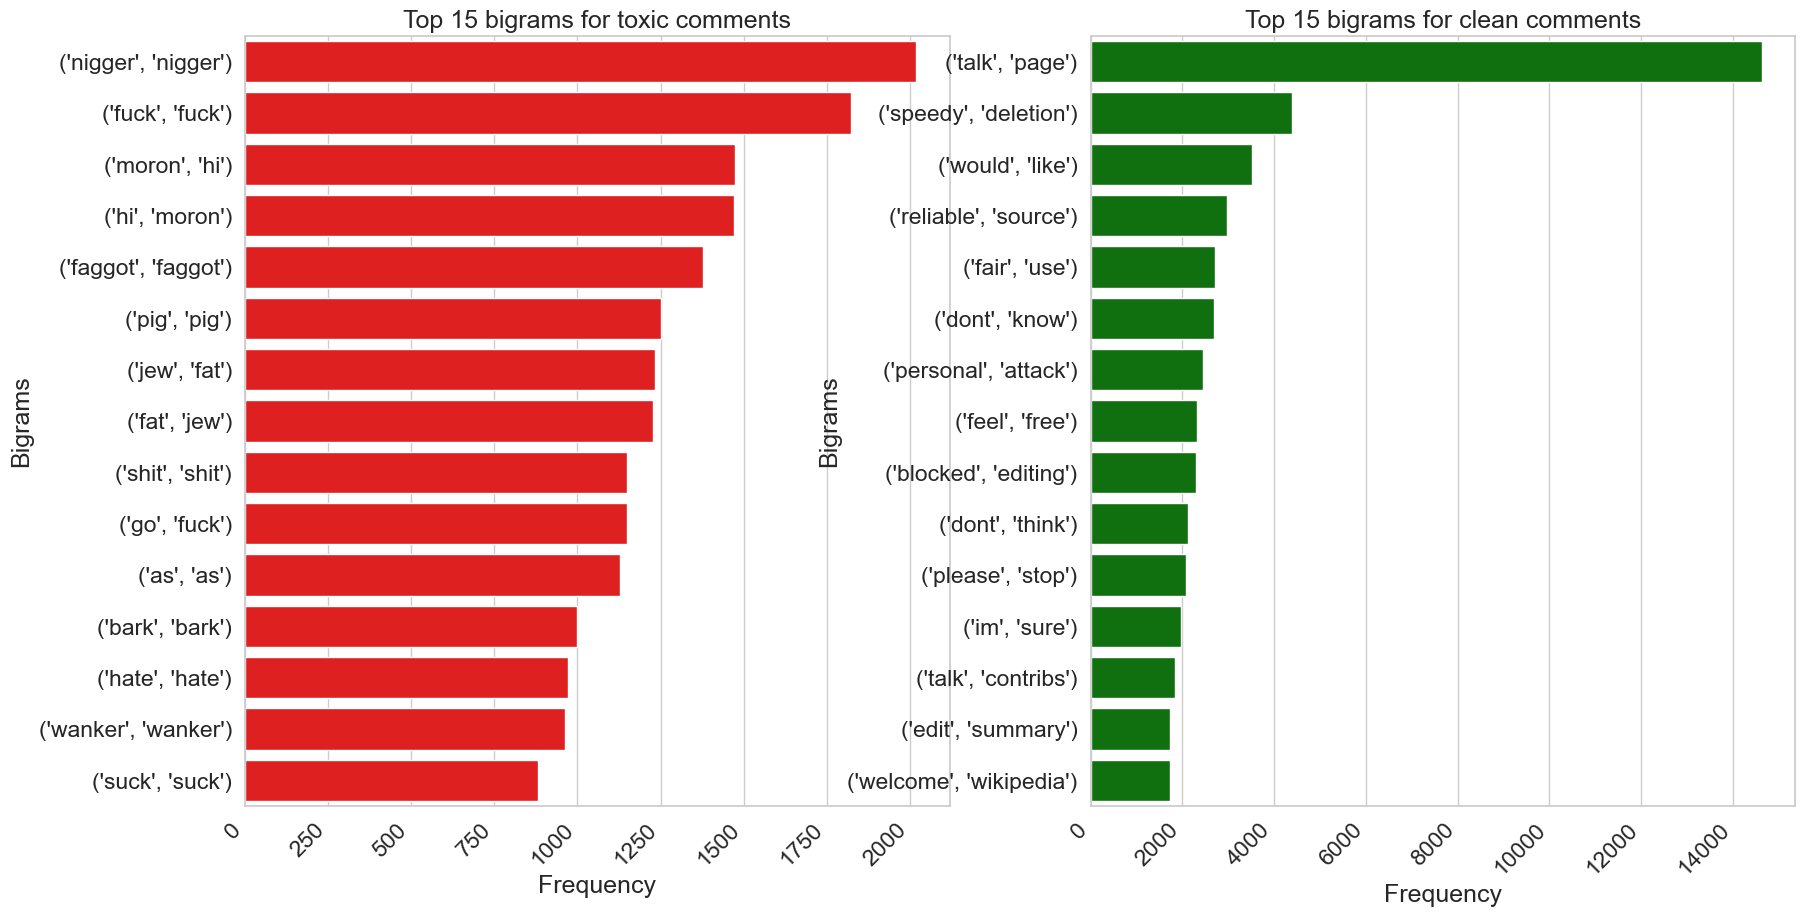

In [35]:
bigrams_clean = ngrams(word_tokenize(clean_words), 2)
bigrams_toxic = ngrams(word_tokenize(toxic_words), 2)

frequency_clean = Counter(bigrams_clean)
frequency_toxic = Counter(bigrams_toxic)

df_negative = pd.DataFrame(frequency_toxic.most_common(15), columns=['Bigram', 'Frequency'])
df_positive = pd.DataFrame(frequency_clean.most_common(15), columns=['Bigram', 'Frequency'])

plt.rcParams['figure.figsize'] = [20, 10]
fig, ax = plt.subplots(1, 2)
sns.set(font_scale = 1.5, style = 'whitegrid')

neg = sns.barplot(x='Frequency', y='Bigram', data=df_negative, color='red', ax=ax[0])
pos = sns.barplot(x='Frequency', y='Bigram', data=df_positive, color='green', ax=ax[1])

plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45, ha="right")
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45, ha="right")

neg.set_title("Top 15 bigrams for toxic comments")
pos.set_title("Top 15 bigrams for clean comments")
neg.set_ylabel("Bigrams")
pos.set_ylabel("Bigrams")

* Some prohibited words are among the top unigrams in poisonous comments, whereas 'article,' 'page,' and 'wikipedia' rank among the top unigrams in clean comments.Igrams and trigrams provide more background information.The bigram "talk, page" indicates concentrated dialogue and involvement within certain platform parts.Notably, the combination of "source, reliable" denotes a strong emphasis on information accuracy and reliability.


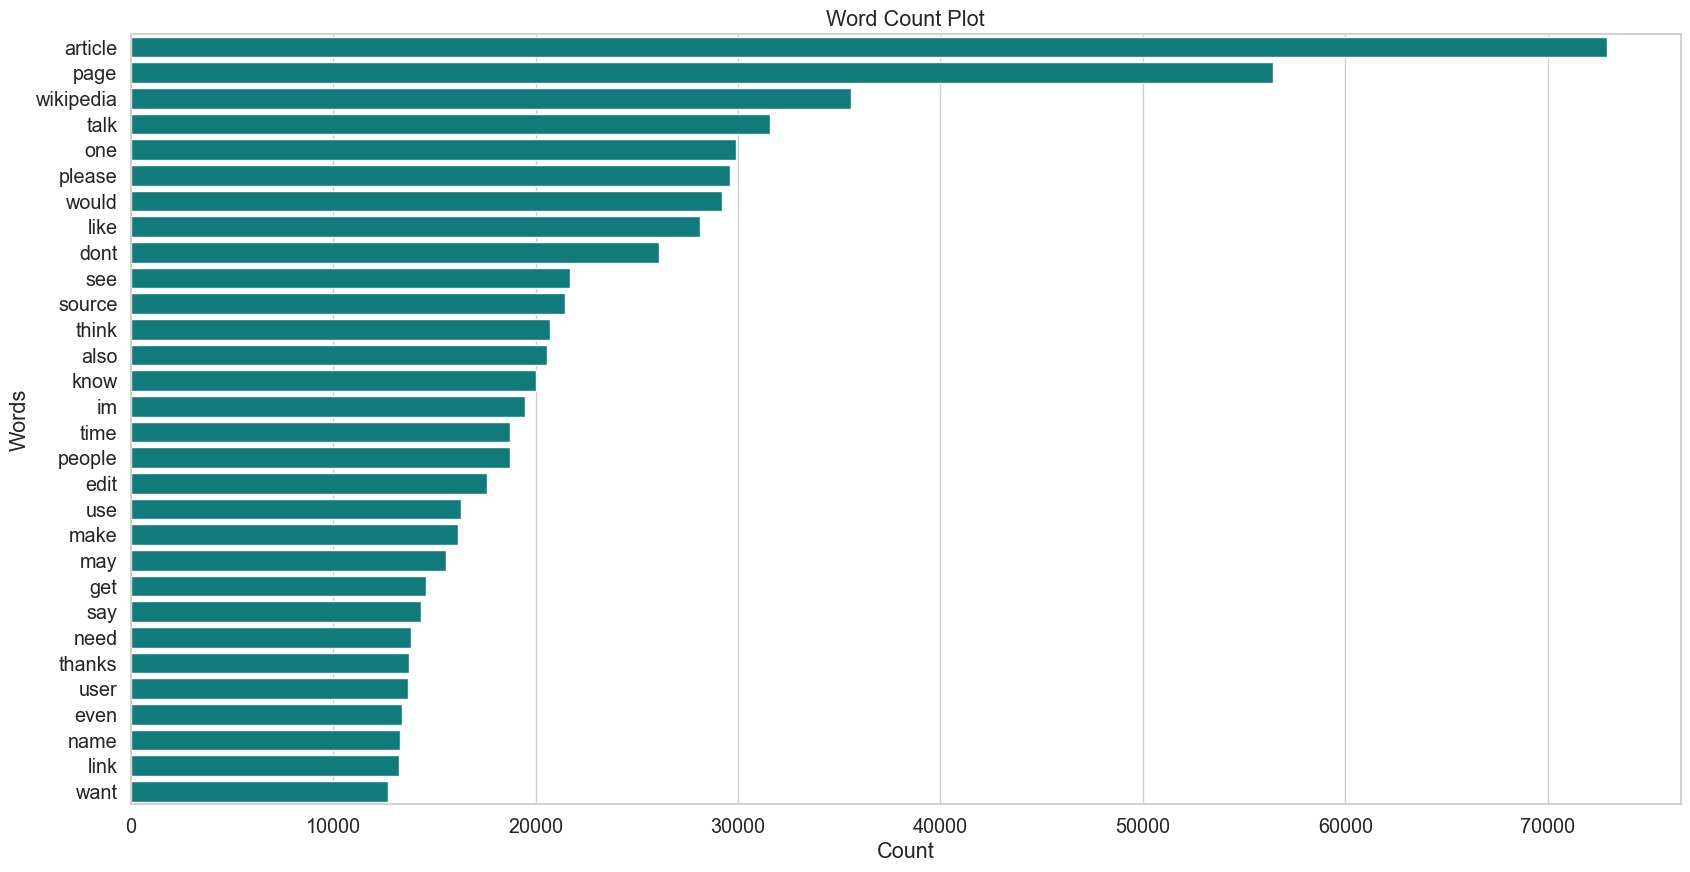

In [36]:
comment = ' '.join([' '.join(comment_text) for comment_text in df['comment_text']])
frequency = Counter(word_tokenize(comment))
df_freq = pd.DataFrame(frequency.most_common(30))

plt.rcParams['figure.figsize'] = [20, 10]
sns.set(font_scale = 1.3, style = 'whitegrid')

# plotting
word_count = sns.barplot(x = df_freq[1], y = df_freq[0], color = 'darkcyan')
word_count.set_title("Word Count Plot")
word_count.set_ylabel("Words")
word_count.set_xlabel("Count");

* The visualization highlights that the words **'article'**, **'page,'** and **'wikipedia'** are among the top words in terms of word count, indicating their prominent presence within the analyzed text data.

# Wordcloud

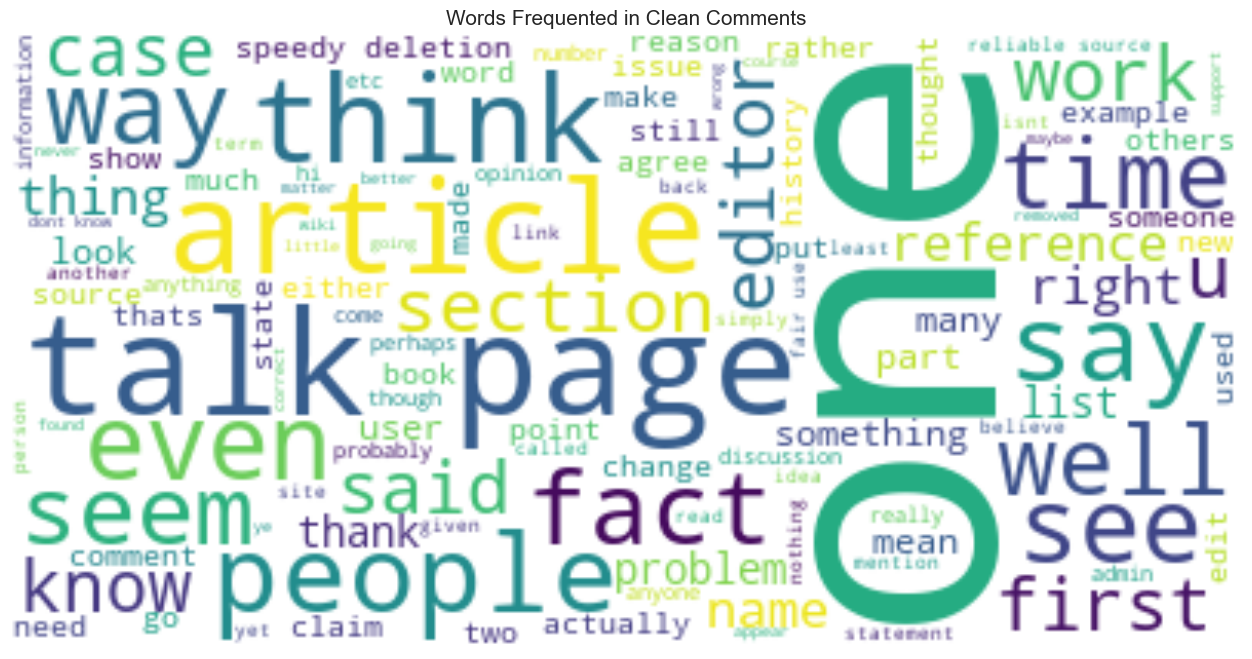

In [37]:
def clean_text(text):
    # Remove unwanted characters like single quotation marks
    cleaned_text = re.sub(r"[^a-zA-Z\s]", "", text)
    return cleaned_text

stopword = set(STOPWORDS)
subset = df[df.clean == True]
text = [clean_text(str(comment)) for comment in subset.comment_text.values]  # Clean the text
wc = WordCloud(background_color="white", max_words=2000, stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(20, 8))
plt.axis("off")
plt.title("Words Frequented in Clean Comments", fontsize=15)
plt.imshow(wc, interpolation='bilinear', cmap=plt.cm.Pastel1)
plt.show()

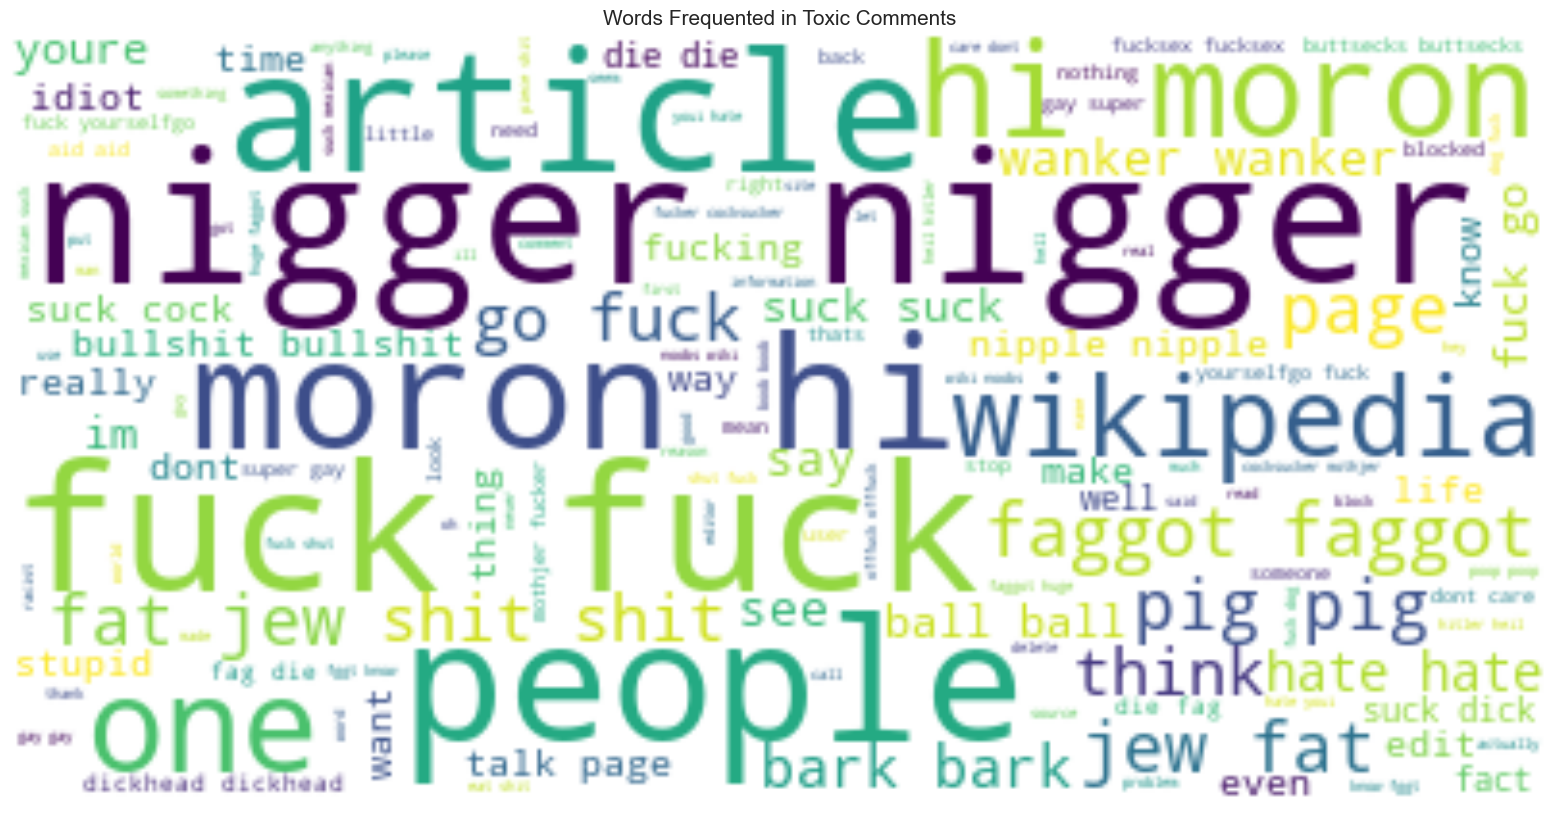

In [38]:
stopword = set(STOPWORDS)
subset = df[df.clean == False]
text = [clean_text(str(comment)) for comment in subset.comment_text.values]
wc = WordCloud(background_color="white", max_words=2000, stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(20, 10))
plt.axis("off")
plt.title("Words Frequented in Toxic Comments", fontsize=15)
plt.imshow(wc, interpolation='bilinear', cmap=plt.cm.Pastel1)  # Change interpolation method if needed
plt.show()

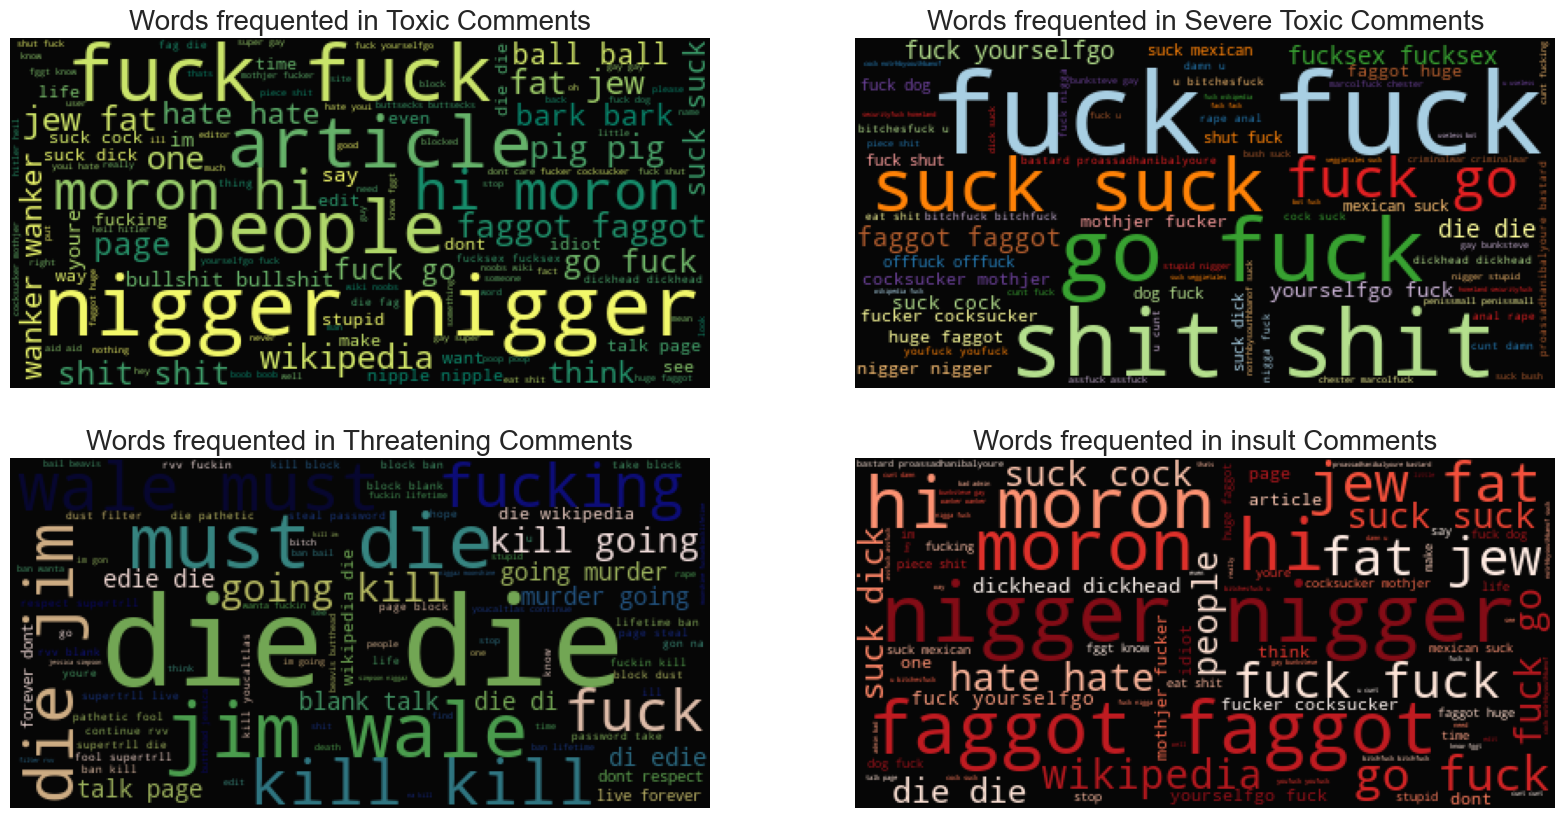

In [39]:
subset=df[df.toxic==1]
text = [clean_text(str(comment)) for comment in subset.comment_text.values]
wc= WordCloud(background_color="black",max_words=4000,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequented in Toxic Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'summer' , random_state=244), alpha=0.98)

plt.subplot(222)
subset=df[df.severe_toxic==1]
text = [clean_text(str(comment)) for comment in subset.comment_text.values]
wc= WordCloud(background_color="black",max_words=2000,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Words frequented in Severe Toxic Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Paired_r' , random_state=244), alpha=0.98)

#Threat comments
plt.subplot(223)
subset=df[df.threat==1]
text = [clean_text(str(comment)) for comment in subset.comment_text.values]
wc= WordCloud(background_color="black",max_words=2000,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Words frequented in Threatening Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=2534), alpha=0.98)

#insult
plt.subplot(224)
subset=df[df.insult==1]
text = [clean_text(str(comment)) for comment in subset.comment_text.values]
wc= WordCloud(background_color="black",max_words=2000,stopwords=stopword)
wc.generate(" ".join(text))
plt.axis("off")
plt.title("Words frequented in insult Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Reds' , random_state=244), alpha=0.98)

plt.show()

In [40]:
df.iloc[1]

id                                                      000103f0d9cfb60f
comment_text           [daww, match, background, colour, im, seemingl...
toxic                                                                  0
severe_toxic                                                           0
obscene                                                                0
threat                                                                 0
insult                                                                 0
identity_hate                                                          0
clean                                                               True
unprocessed_comment    D'aww! He matches this background colour I'm s...
count_sent                                                             1
count_word                                                            17
count_unique_word                                                     17
count_letters                                      

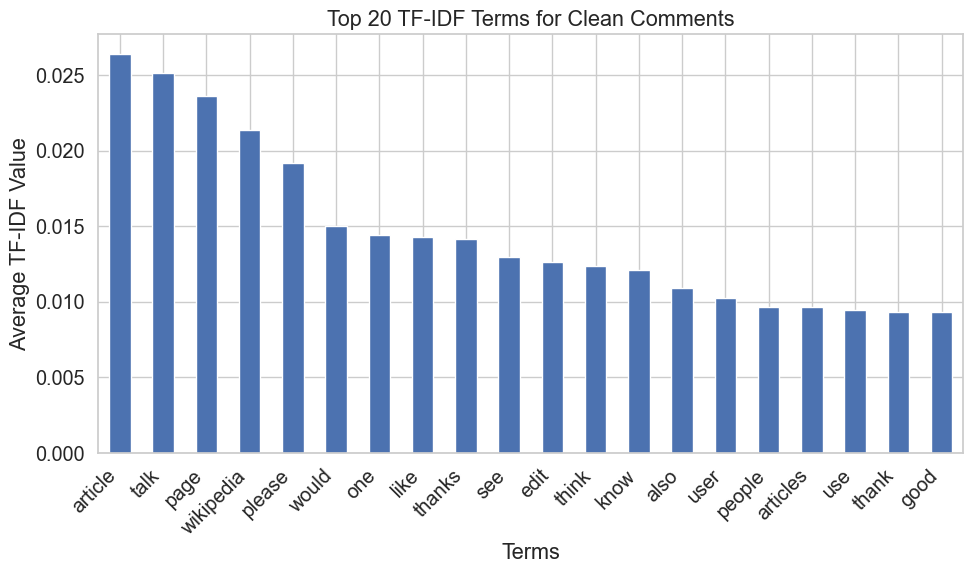

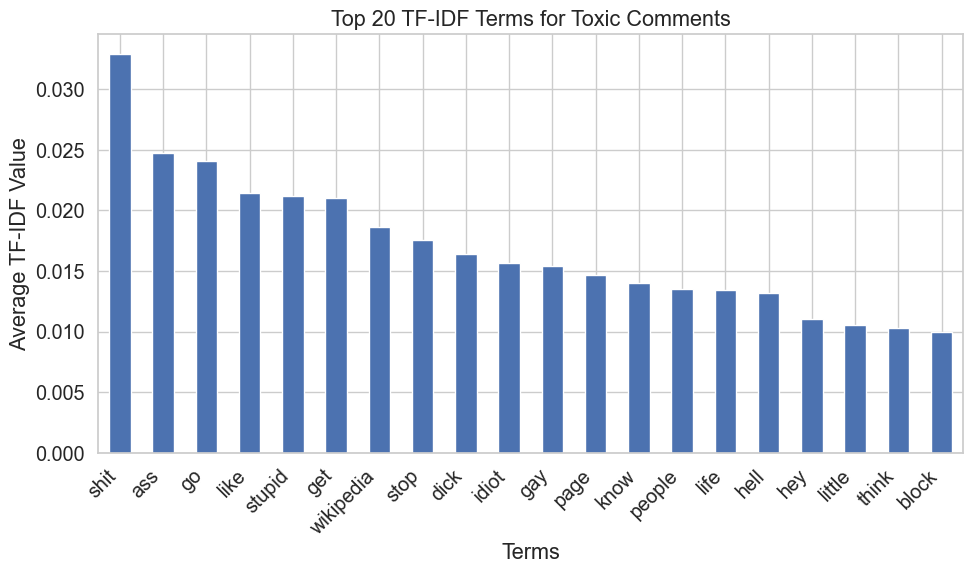

In [41]:
clean_comments1 = df[df['clean']]['unprocessed_comment']
toxic_comments1 = df[~df['clean']]['unprocessed_comment']


tfidf_vectorizer = TfidfVectorizer(max_features=5000,stop_words=stop_words, )
tfidf_matrix_clean = tfidf_vectorizer.fit_transform(clean_comments1)
tfidf_df_clean = pd.DataFrame(tfidf_matrix_clean.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

tfidf_matrix_toxic = tfidf_vectorizer.transform(toxic_comments1)
tfidf_df_toxic = pd.DataFrame(tfidf_matrix_toxic.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

fig, ax = plt.subplots(figsize=(10, 6))

tfidf_df_clean.mean().sort_values(ascending=False)[:20].plot(kind='bar', ax=ax)
ax.set_xlabel('Terms')
ax.set_ylabel('Average TF-IDF Value')
ax.set_title('Top 20 TF-IDF Terms for Clean Comments')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

# Plotting toxic comments
fig, ax = plt.subplots(figsize=(10, 6))

tfidf_df_toxic.mean().sort_values(ascending=False)[:20].plot(kind='bar', ax=ax)
ax.set_xlabel('Terms')
ax.set_ylabel('Average TF-IDF Value')
ax.set_title('Top 20 TF-IDF Terms for Toxic Comments')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

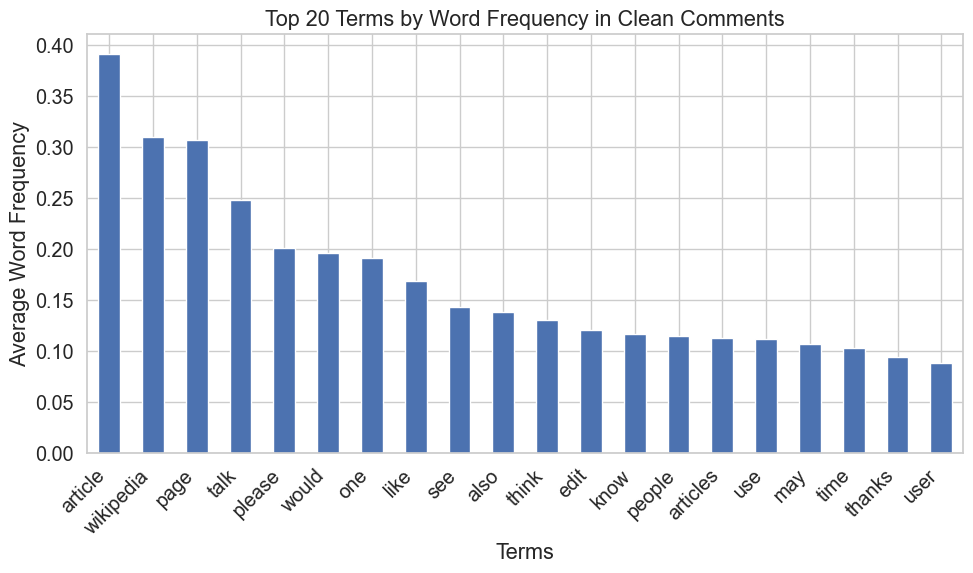

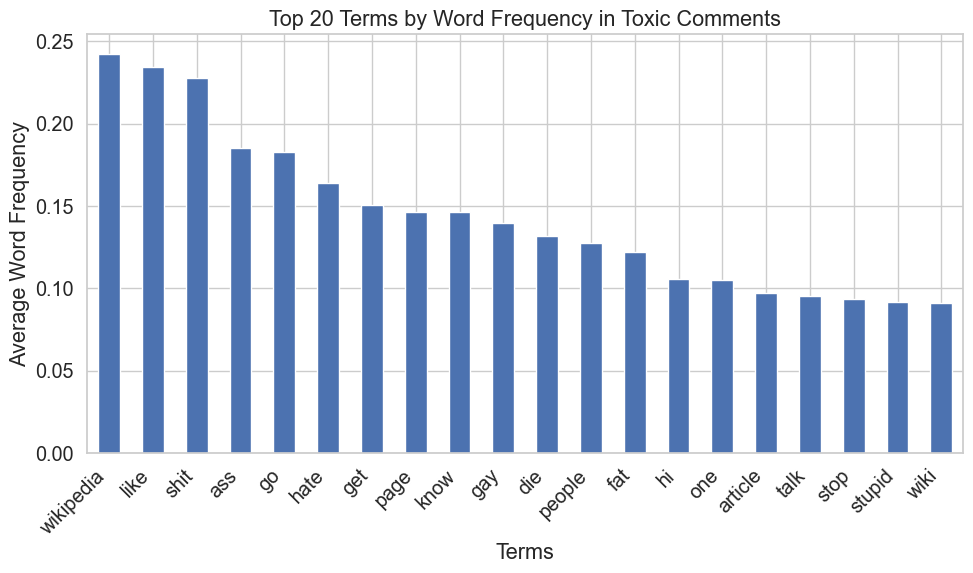

In [42]:
vectorizer = CountVectorizer(max_features=5000, stop_words=stop_words)

clean_matrix = vectorizer.fit_transform(clean_comments1)
toxic_matrix = vectorizer.transform(toxic_comments1)
clean_df = pd.DataFrame(clean_matrix.toarray(), columns=vectorizer.get_feature_names_out())
toxic_df = pd.DataFrame(toxic_matrix.toarray(), columns=vectorizer.get_feature_names_out())

fig, ax = plt.subplots(figsize=(10, 6))

clean_df.mean().sort_values(ascending=False)[:20].plot(kind='bar', ax=ax)
ax.set_xlabel('Terms')
ax.set_ylabel('Average Word Frequency')
ax.set_title('Top 20 Terms by Word Frequency in Clean Comments')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

fig, ax = plt.subplots(figsize=(10, 6))

toxic_df.mean().sort_values(ascending=False)[:20].plot(kind='bar', ax=ax)
ax.set_xlabel('Terms')
ax.set_ylabel('Average Word Frequency')
ax.set_title('Top 20 Terms by Word Frequency in Toxic Comments')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159571 non-null  object 
 1   comment_text         159571 non-null  object 
 2   toxic                159571 non-null  int64  
 3   severe_toxic         159571 non-null  int64  
 4   obscene              159571 non-null  int64  
 5   threat               159571 non-null  int64  
 6   insult               159571 non-null  int64  
 7   identity_hate        159571 non-null  int64  
 8   clean                159571 non-null  bool   
 9   unprocessed_comment  159571 non-null  object 
 10  count_sent           159571 non-null  int64  
 11  count_word           159571 non-null  int64  
 12  count_unique_word    159571 non-null  int64  
 13  count_letters        159571 non-null  int64  
 14  word_unique_percent  159571 non-null  float64
 15  count_punctuation

# TFIDF for feature selection

In [44]:
tfidf_comment = TfidfVectorizer(max_features=500)
comment_matrix = tfidf_comment.fit_transform(df['unprocessed_comment'])
comment_df = pd.DataFrame(comment_matrix.toarray(), columns=tfidf_comment.get_feature_names_out())
data_final = pd.concat([df.drop(columns=['unprocessed_comment']), comment_df], axis=1)

In [45]:
data_final.head(3)

id                                       comment_text  toxic  \
0  0000997932d777bf  [explanation, edits, made, username, hardcore,...      0   
1  000103f0d9cfb60f  [daww, match, background, colour, im, seemingl...      0   
2  000113f07ec002fd  [hey, man, im, really, trying, edit, war, guy,...      0   

   severe_toxic  obscene  threat  insult  identity_hate  clean  count_sent  \
0             0        0       0       0              0   True           2   
1             0        0       0       0              0   True           1   
2             0        0       0       0              0   True           1   

   ...  written  wrong  www  year  years  yes  yet  you  your  yourself  
0  ...      0.0    0.0  0.0   0.0    0.0  0.0  0.0  0.0   0.0       0.0  
1  ...      0.0    0.0  0.0   0.0    0.0  0.0  0.0  0.0   0.0       0.0  
2  ...      0.0    0.0  0.0   0.0    0.0  0.0  0.0  0.0   0.0       0.0  

[3 rows x 519 columns]

* A TF-IDF (Term Frequency-Inverse Document Frequency) vectorization technique is applied to the 'unprocessed_comment' column of the dataset, creating a matrix that represents the textual content's importance in relation to the entire corpus.

* The TfidfVectorizer is configured to limit the number of features to a maximum of 500, helping manage the dimensionality of the data while capturing the most significant terms.

* The resulting TF-IDF matrix, named 'comment_matrix,' is transformed into a DataFrame called 'comment_df.' This DataFrame contains numerical representations of the text data, with columns corresponding to the extracted features.

In [46]:
features = data_final.iloc[:, 9:]
target = data_final.iloc[:, 2:8]

In [47]:
features.head(2)

count_sent  count_word  count_unique_word  count_letters  \
0           2          43                 41            264   
1           1          17                 17            112   

   word_unique_percent  count_punctuations  count_words_upper  \
0            95.348837                  10                  2   
1           100.000000                  12                  1   

   count_words_title  count_stopwords  mean_word_len  ...  written  wrong  \
0                 11               18       8.888889  ...      0.0    0.0   
1                  3                2       8.142857  ...      0.0    0.0   

   www  year  years  yes  yet  you  your  yourself  
0  0.0   0.0    0.0  0.0  0.0  0.0   0.0       0.0  
1  0.0   0.0    0.0  0.0  0.0  0.0   0.0       0.0  

[2 rows x 510 columns]

In [48]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   toxic          159571 non-null  int64
 1   severe_toxic   159571 non-null  int64
 2   obscene        159571 non-null  int64
 3   threat         159571 non-null  int64
 4   insult         159571 non-null  int64
 5   identity_hate  159571 non-null  int64
dtypes: int64(6)
memory usage: 7.3 MB


# Spliting Dataset

In [49]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

In [50]:
X_test.head(2)

count_sent  count_word  count_unique_word  count_letters  \
119105           1          62                 53            325   
131631           5          41                 37            232   

        word_unique_percent  count_punctuations  count_words_upper  \
119105            85.483871                  17                  1   
131631            90.243902                  10                  2   

        count_words_title  count_stopwords  mean_word_len  ...  written  \
119105                  6               27       8.281250  ...      0.0   
131631                  6               22       9.666667  ...      0.0   

        wrong  www  year  years  yes  yet       you     your  yourself  
119105    0.0  0.0   0.0    0.0  0.0  0.0  0.141422  0.00000       0.0  
131631    0.0  0.0   0.0    0.0  0.0  0.0  0.191625  0.13914       0.0  

[2 rows x 510 columns]

# Naive Byes

naive Byes Train Score: 0.4303297180768395
Naive byes Test Score: 0.4289474343869852
               precision    recall  f1-score   support

        toxic       0.13      0.74      0.22      3815
 severe_toxic       0.17      0.22      0.19       406
      obscene       0.08      0.74      0.14      2143
       threat       0.01      0.38      0.01       105
       insult       0.07      0.75      0.13      2011
identity_hate       0.01      0.68      0.03       357

    micro avg       0.07      0.71      0.13      8837
    macro avg       0.08      0.59      0.12      8837
 weighted avg       0.10      0.71      0.17      8837
  samples avg       0.04      0.07      0.05      8837

Accuracy Score: 0.4289


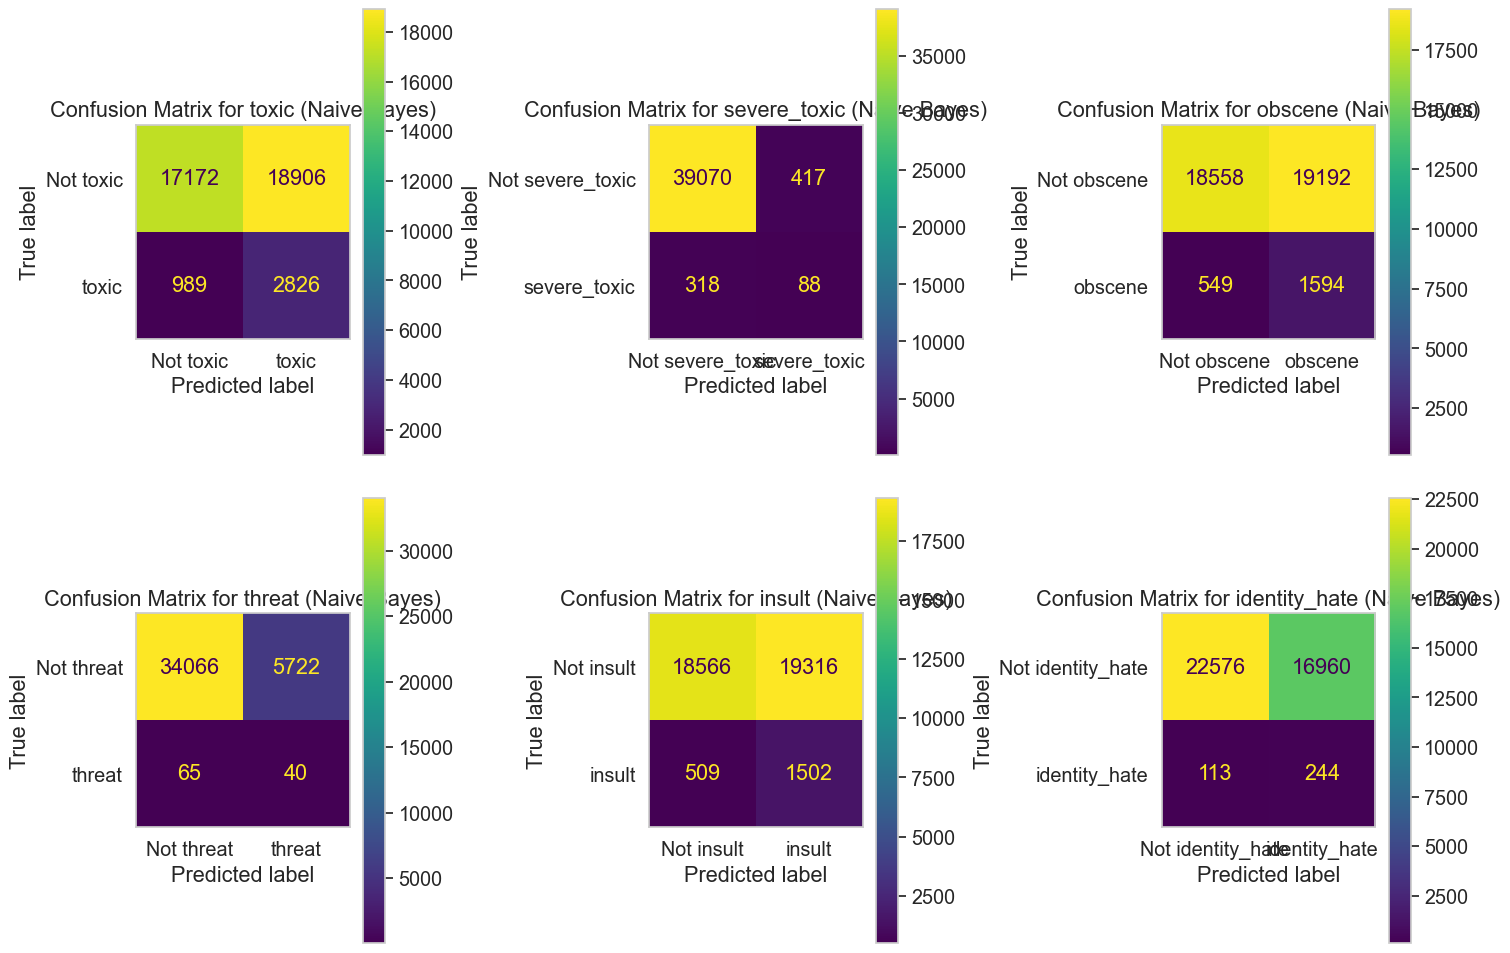

In [54]:
nb_classifier = MultinomialNB()
multi_output_classifier = MultiOutputClassifier(nb_classifier)
multi_output_classifier.fit(X_train, y_train)
y_predn = multi_output_classifier.predict(X_test)
confusion_matrices = multilabel_confusion_matrix(y_test, y_predn)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()
nb_train_score = multi_output_classifier.score(X_train,y_train)
nb_test_score = multi_output_classifier.score(X_test,y_test)
print("naive Byes Train Score:", nb_train_score)
print("Naive byes Test Score:", nb_test_score)
report = classification_report(y_test, y_predn, target_names=y_test.columns, zero_division=0.0)

accuracy = accuracy_score(y_test, y_predn)
print(report)
print(f'Accuracy Score: {accuracy:.4f}')
for i, (confusion_matrix, label) in enumerate(zip(confusion_matrices, y_test.columns)):
    ax = axes[i]
    disp = ConfusionMatrixDisplay(confusion_matrix, display_labels=['Not ' + label, label])
    disp.plot(ax=ax)
    ax.set_title(f'Confusion Matrix for {label} (Naive Bayes)')
    ax.grid(False)

plt.tight_layout()
plt.show()

* The Naive Bayes model demonstrates relatively consistent performance between training and testing, with train and test scores of approximately 0.435 and 0.434, respectively, indicating that the model doesn't suffer from significant overfitting.

* Although achieving a relatively low overall accuracy of 0.4335, the model showcases varying precision and recall scores across different toxic comment categories. Notably, it exhibits higher recall for categories like 'toxic,' 'obscene,' and 'insult,' suggesting the model's ability to correctly identify a considerable proportion of instances within these categories, despite the low precision.

# Random Forest Classifier 

In [55]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [57]:
y_predr = rf_classifier.predict(X_test)
rf_train_score = rf_classifier.score(X_train,y_train)
rf_test_score = rf_classifier.score(X_test,y_test)
print("Random Forest Train Score:", rf_train_score)
print("Random Forest Test Score:", rf_test_score)
report = classification_report(y_test, y_predr, target_names=y_test.columns, zero_division=0.0)
print(report)
accuracy = accuracy_score(y_test, y_predr)
print(f'Accuracy Score: {accuracy:.4f}')

Random Forest Train Score: 0.9998746636808771
Random Forest Test Score: 0.9095079337227082
               precision    recall  f1-score   support

        toxic       0.91      0.43      0.58      3815
 severe_toxic       0.55      0.07      0.13       406
      obscene       0.89      0.54      0.67      2143
       threat       0.33      0.02      0.04       105
       insult       0.75      0.37      0.50      2011
identity_hate       0.70      0.04      0.08       357

    micro avg       0.86      0.40      0.55      8837
    macro avg       0.69      0.24      0.33      8837
 weighted avg       0.84      0.40      0.54      8837
  samples avg       0.04      0.03      0.03      8837

Accuracy Score: 0.9095


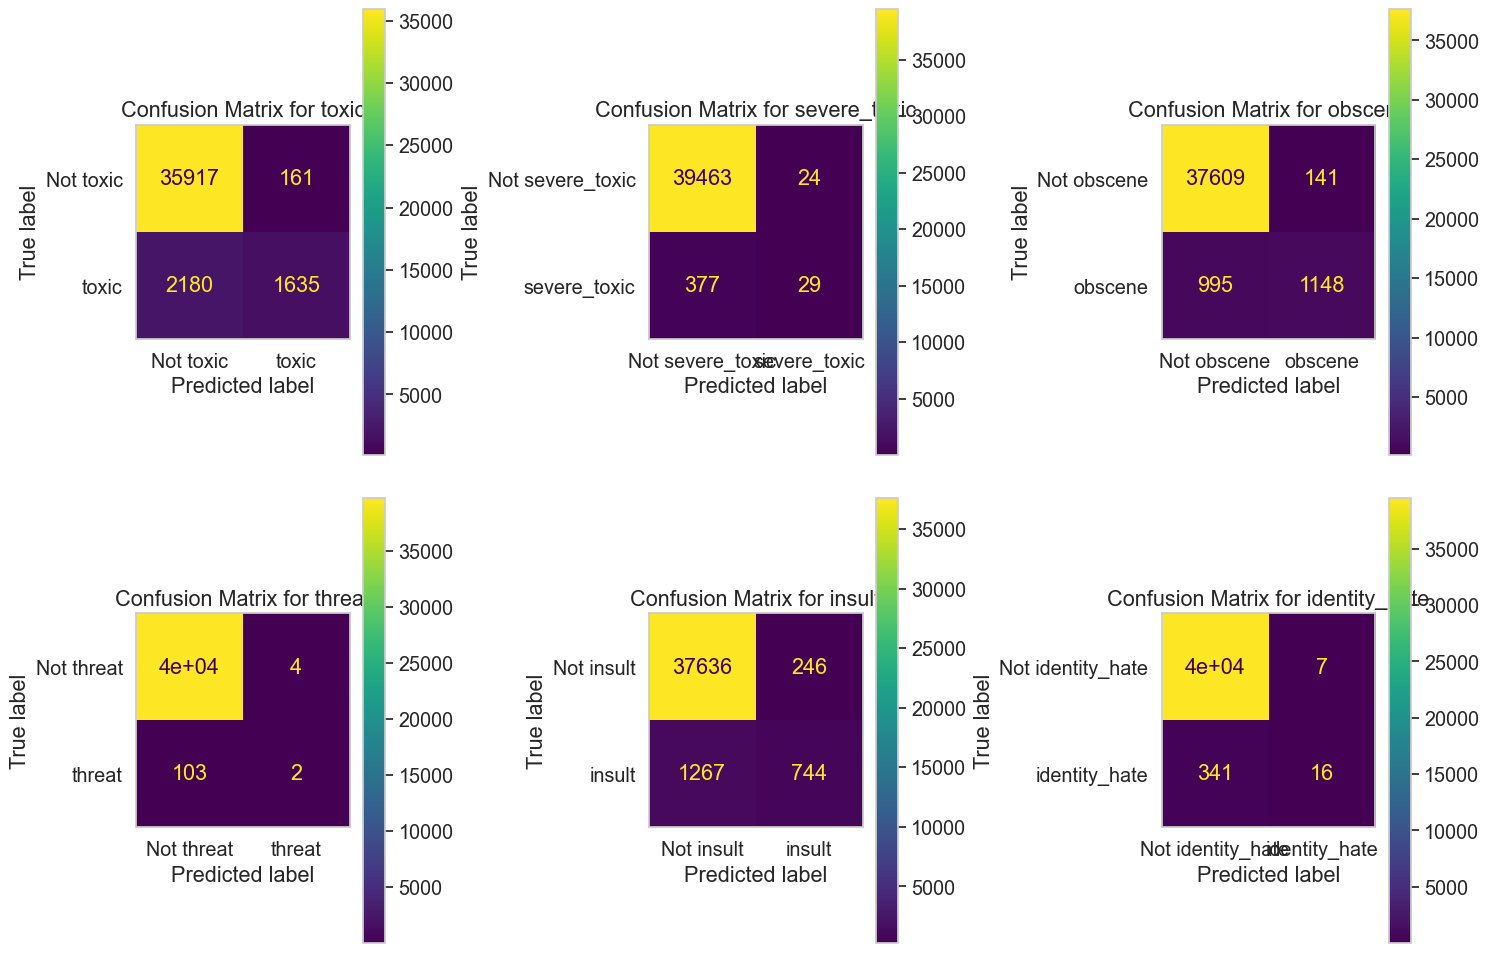

In [59]:
confusion_matrices = multilabel_confusion_matrix(y_test, y_predr)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, (confusion_matrix, label) in enumerate(zip(confusion_matrices, y_test.columns)):
    ax = axes[i]
    disp = ConfusionMatrixDisplay(confusion_matrix, display_labels=['Not ' + label, label])
    disp.plot(ax=ax)
    ax.set_title(f'Confusion Matrix for {label}')
    ax.grid(False)

plt.tight_layout()
plt.show()

* The Random Forest model demonstrates a remarkable train score of 0.9999, suggesting a strong fit to the training data, while maintaining a substantial test score of 0.9095, indicating its ability to generalize well to unseen data.

* Despite the high accuracy score of 0.9095, the model exhibits varying precision and recall values across different toxic comment categories. Notably, it achieves high precision and recall for categories like 'toxic' and 'obscene,' reflecting its capability to effectively identify and classify instances in these categories, while showing lower performance in categories such as 'severe_toxic,' 'threat,' and 'identity_hate.'

# Decision Tree classifier

Decision tree Train Score: 0.999916442453918
Decision tree Test Score: 0.8418018198681473
               precision    recall  f1-score   support

        toxic       0.52      0.53      0.52      3815
 severe_toxic       0.30      0.30      0.30       406
      obscene       0.59      0.58      0.58      2143
       threat       0.15      0.19      0.17       105
       insult       0.44      0.43      0.43      2011
identity_hate       0.19      0.18      0.19       357

    micro avg       0.49      0.49      0.49      8837
    macro avg       0.36      0.37      0.37      8837
 weighted avg       0.49      0.49      0.49      8837
  samples avg       0.05      0.04      0.04      8837

Accuracy Score: 0.8418


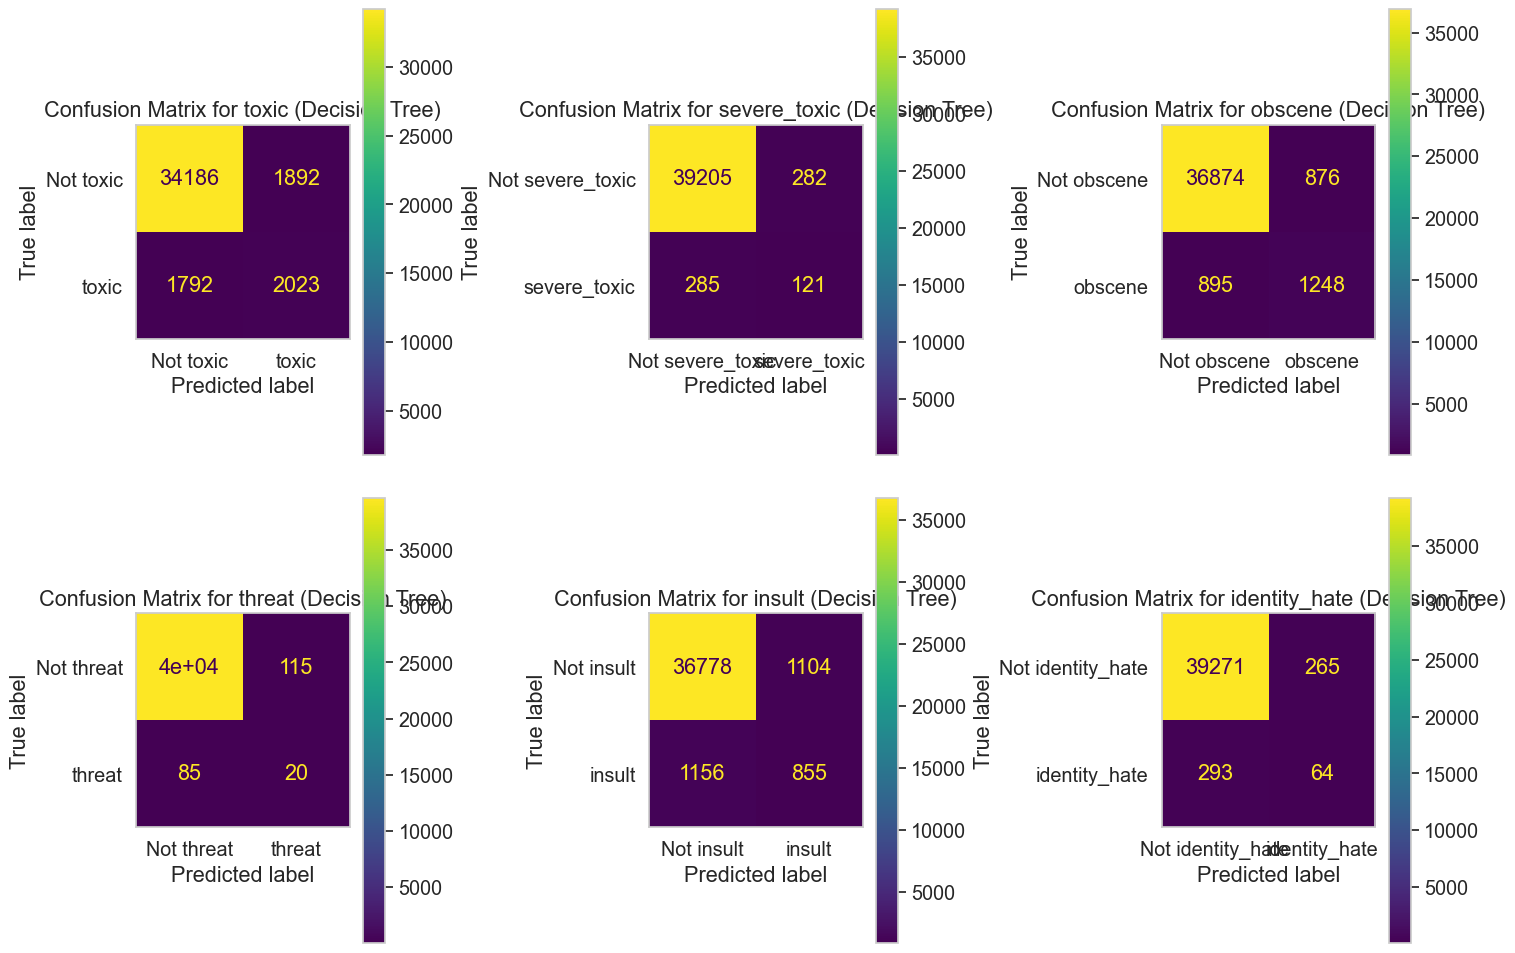

In [61]:
tree_classifier = DecisionTreeClassifier(random_state=4)
multi_output_classifier = MultiOutputClassifier(tree_classifier)
multi_output_classifier.fit(X_train, y_train)
y_predd = multi_output_classifier.predict(X_test)
confusion_matrices = multilabel_confusion_matrix(y_test, y_predd)

tree_train_score = multi_output_classifier.score(X_train,y_train)
tree_test_score = multi_output_classifier.score(X_test,y_test)
print("Decision tree Train Score:", tree_train_score)
print("Decision tree Test Score:", tree_test_score)

report = classification_report(y_test, y_predd, target_names=y_test.columns, zero_division=0.0)
accuracy = accuracy_score(y_test, y_predd)
print(report)
print(f'Accuracy Score: {accuracy:.4f}')

# Plot confusion matrices for each label
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, (confusion_matrix, label) in enumerate(zip(confusion_matrices, y_test.columns)):
    ax = axes[i]
    disp = ConfusionMatrixDisplay(confusion_matrix, display_labels=['Not ' + label, label])
    disp.plot(ax=ax)
    ax.set_title(f'Confusion Matrix for {label} (Decision Tree)')
    ax.grid(False)

plt.tight_layout()
plt.show()

* The Decision Tree model displays a high train score of 0.9999, indicating a strong fit to the training data, while achieving a solid test score of 0.8431, signifying reasonable generalization ability on unseen data.

* Despite its relatively good accuracy score of 0.8758, the Decision Tree model shows variations in precision and recall across different toxic comment categories. Notably, it performs well in 'obscene' and 'toxic' categories, achieving balanced precision and recall, but demonstrates challenges in correctly classifying instances in categories like 'severe_toxic,' 'threat,' and 'identity_hate,' where precision and recall values are lower.

# Gradient Boosting

Gradient Boosting Train Score: 0.9151055331807015
Gradient Boosting Test Score: 0.9091820620158925
               precision    recall  f1-score   support

        toxic       0.90      0.42      0.58      3815
 severe_toxic       0.46      0.21      0.29       406
      obscene       0.89      0.55      0.68      2143
       threat       0.36      0.08      0.13       105
       insult       0.77      0.40      0.53      2011
identity_hate       0.40      0.13      0.20       357

    micro avg       0.83      0.42      0.56      8837
    macro avg       0.63      0.30      0.40      8837
 weighted avg       0.82      0.42      0.56      8837
  samples avg       0.04      0.03      0.03      8837

Accuracy Score: 0.9092


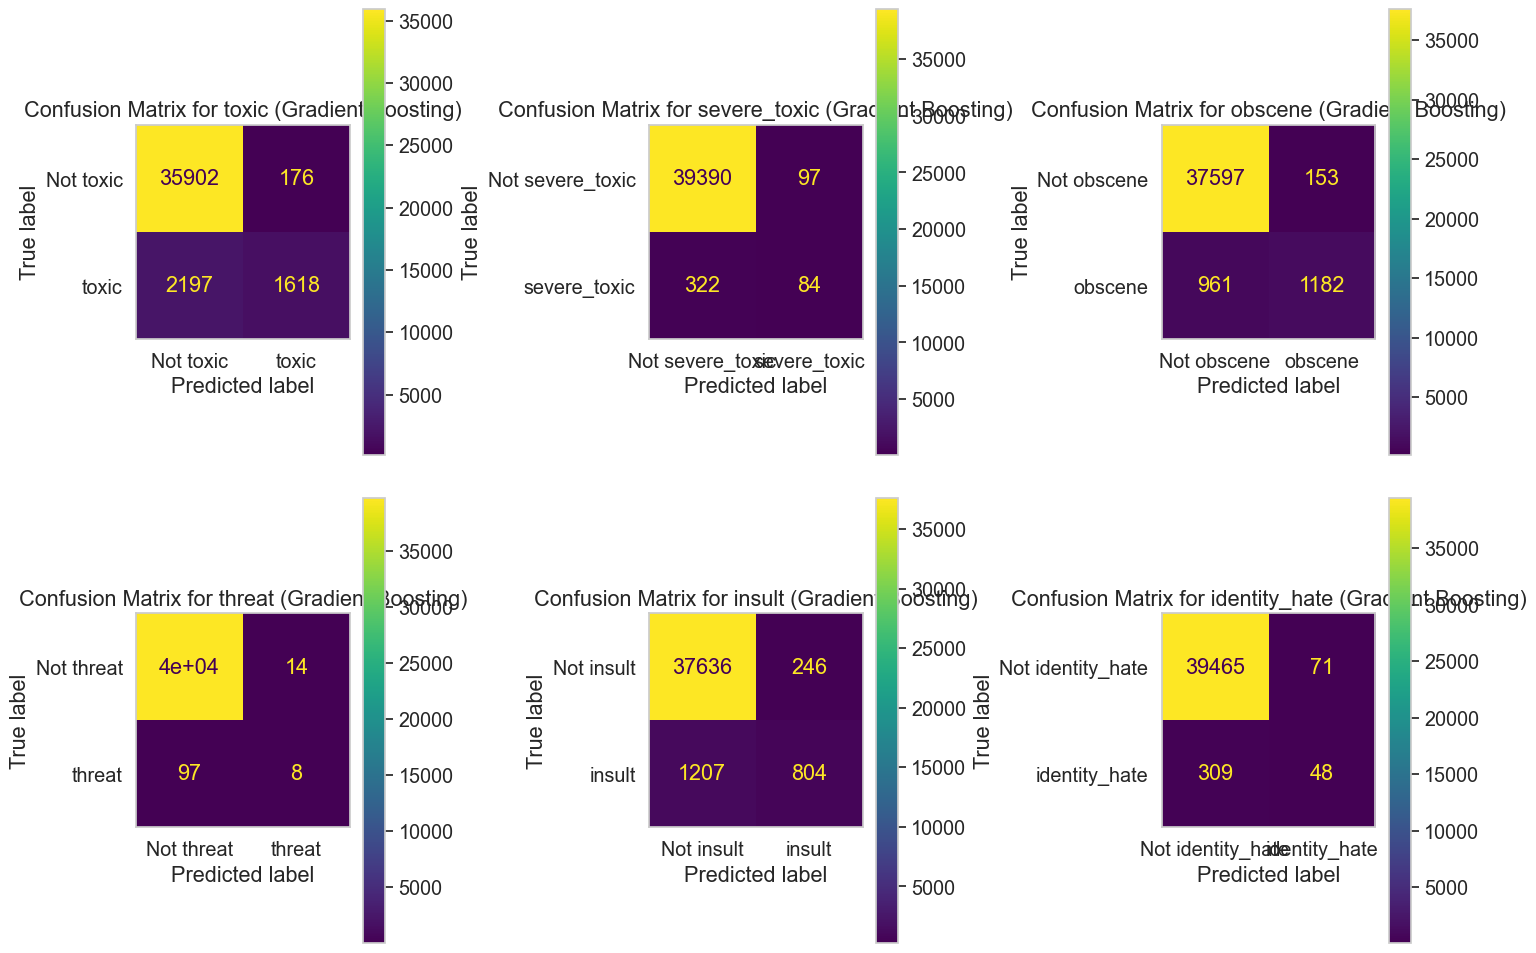

In [62]:
gb_classifier = GradientBoostingClassifier(random_state=42)
multi_output_classifier = MultiOutputClassifier(gb_classifier)
multi_output_classifier.fit(X_train, y_train)
y_predg = multi_output_classifier.predict(X_test)
confusion_matrices = multilabel_confusion_matrix(y_test, y_predg)
gb_train_score = multi_output_classifier.score(X_train,y_train)
gb_test_score = multi_output_classifier.score(X_test,y_test)
print("Gradient Boosting Train Score:", gb_train_score)
print("Gradient Boosting Test Score:", gb_test_score)
report = classification_report(y_test, y_predg, target_names=y_test.columns, zero_division=0.0)
accuracy = accuracy_score(y_test, y_predg)
print(report)
print(f'Accuracy Score: {accuracy:.4f}')
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, (confusion_matrix, label) in enumerate(zip(confusion_matrices, y_test.columns)):
    ax = axes[i]
    disp = ConfusionMatrixDisplay(confusion_matrix, display_labels=['Not ' + label, label])
    disp.plot(ax=ax)
    ax.set_title(f'Confusion Matrix for {label} (Gradient Boosting)')
    ax.grid(False)

plt.tight_layout()
plt.show()

* Achieved a test score of 0.9092 and a train score of 0.9151, indicating strong generalization while training well.

* Displayed varying precision and recall values across toxic comment categories, excelling in some categories like 'obscene' and 'toxic' while facing challenges in categories such as 'severe_toxic,' 'threat,' and 'identity_hate.'

# K-Fold Validation

In [73]:
X_train_initial, X_test, y_train_initial, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

n_splits = 5
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

cv_scores = []

for train_idx, val_idx in kfold.split(X_train_initial):
    X_train_fold, X_val_fold = X_train_initial.iloc[train_idx], X_train_initial.iloc[val_idx]
    y_train_fold, y_val_fold = y_train_initial.iloc[train_idx], y_train_initial.iloc[val_idx]

    rf_classifier = RandomForestClassifier(random_state=42)
    rf_classifier.fit(X_train_fold, y_train_fold)

    y_pred_fold = rf_classifier.predict(X_val_fold)
    fold_accuracy = accuracy_score(y_val_fold, y_pred_fold)
    cv_scores.append(fold_accuracy)

average_cv_score = np.mean(cv_scores)
print(f"Average Cross-Validation Score: {average_cv_score:.4f}")

rf_classifier_final = RandomForestClassifier(random_state=42)
rf_classifier_final.fit(X_train_initial, y_train_initial)

y_pred_final = rf_classifier_final.predict(X_test)

rf_test_score = accuracy_score(y_test, y_pred_final)
print("Random Forest Test Score:", rf_test_score)

report = classification_report(y_test, y_pred_final)
print(report)

Average Cross-Validation Score: 0.9103
Random Forest Test Score: 0.9095079337227082
              precision    recall  f1-score   support

           0       0.91      0.43      0.58      3815
           1       0.55      0.07      0.13       406
           2       0.89      0.54      0.67      2143
           3       0.33      0.02      0.04       105
           4       0.75      0.37      0.50      2011
           5       0.70      0.04      0.08       357

   micro avg       0.86      0.40      0.55      8837
   macro avg       0.69      0.24      0.33      8837
weighted avg       0.84      0.40      0.54      8837
 samples avg       0.04      0.03      0.03      8837



C:\Users\monil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\monil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* The classification model's performance was evaluated comprehensively using a variety of metrics. The model demonstrated strong precision in identifying instances belonging to Class 0, achieving a value of 0.91. However, the recall for this class was relatively lower at 0.43, indicating that while the model is proficient at correctly labeling instances in this category, it may have missed a notable portion of actual instances. The F1-score, which balances precision and recall, yielded a value of 0.58 for Class 0.

* For Class 1, the precision was 0.55, suggesting a moderate accuracy in correctly classifying instances, but the recall of 0.07 implies that the model struggled to capture a substantial portion of true positives. As a result, the F1-score for this class was 0.13, indicating a relatively lower harmonic mean between precision and recall.

* In the case of Class 2, the model displayed high precision (0.89) and relatively good recall (0.54), resulting in an F1-score of 0.67. This suggests a favorable balance between accurate positive predictions and successful capturing of actual positive instances.

* For Class 3, the precision of 0.33 indicates a modest ability to correctly classify instances, although the low recall of 0.02 implies a significant challenge in identifying true positives. Consequently, the F1-score for this class was 0.04, reflecting a limited overall performance.

* Class 4 exhibited a precision of 0.75 and a recall of 0.37, resulting in an F1-score of 0.50. This indicates a satisfactory balance between accurate positive predictions and capturing a portion of actual positive instances.

* In Class 5, the precision was 0.70, implying reasonably accurate positive predictions. However, the low recall of 0.04 indicates that the model encountered difficulty in identifying a significant number of true positives. The F1-score for this class was 0.08, reflecting a moderate overall performance.

* The model's overall performance was characterized by a micro average precision of 0.86 and a recall of 0.40, resulting in a micro average F1-score of 0.55. The macro average metrics, which provide a balanced view across all classes, yielded precision of 0.69, recall of 0.24, and an F1-score of 0.33. The weighted average metrics, which account for class imbalances, demonstrated precision of 0.84, recall of 0.40, and an F1-score of 0.54. The samples average metrics, which assess performance at the instance level, yielded precision of 0.04, recall of 0.03, and an F1-score of 0.03.

* **In summary**, while the model exhibited strengths in certain classes with high precision and balanced metrics, there is room for improvement in recall, particularly in classes where capturing true positives proved challenging. Fine-tuning the model to address these discrepancies could lead to enhanced overall performance.

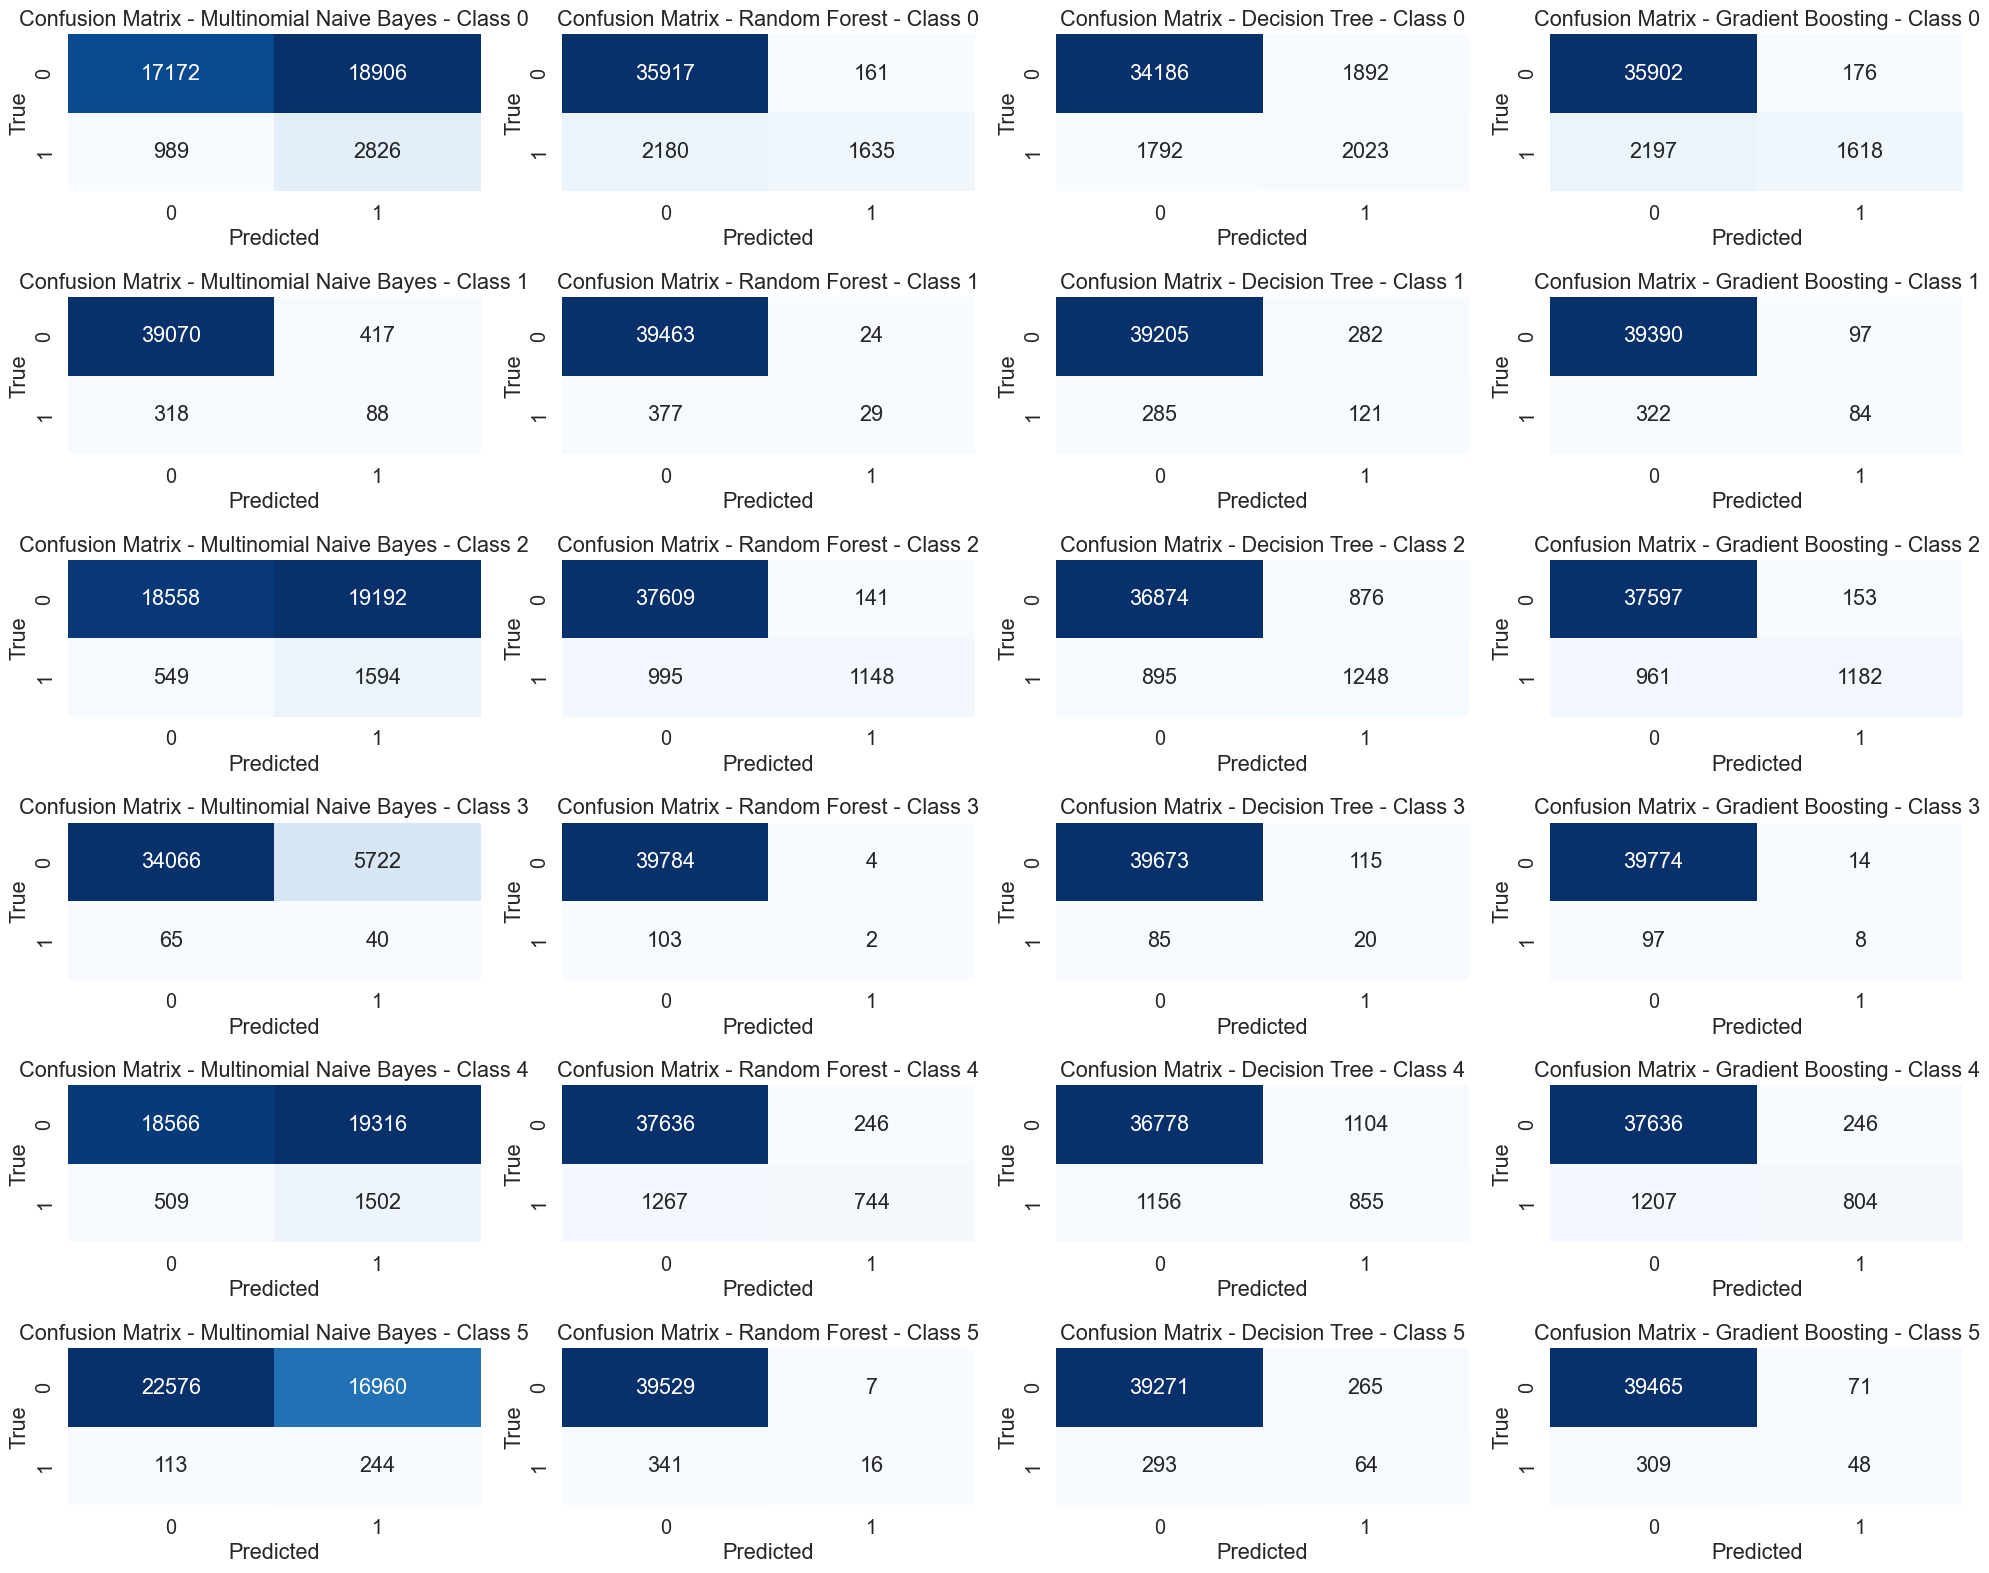

In [71]:
classifiers = ['Multinomial Naive Bayes', 'Random Forest', 'Decision Tree', 'Gradient Boosting']
predictions = [y_predn, y_predr, y_predd, y_predg]

plt.figure(figsize=(20, 16))

for i, (classifier_name, y_pred) in enumerate(zip(classifiers, predictions)):
    confusion_matrices = multilabel_confusion_matrix(y_test, y_pred)
    
    for j, matrix in enumerate(confusion_matrices):
        plt.subplot(len(confusion_matrices), len(classifiers), j * len(classifiers) + i + 1)
        sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix - {classifier_name} - Class {j}')
        plt.xlabel('Predicted')
        plt.ylabel('True')

plt.tight_layout()
plt.show()

# Conclusion

* In summary, our journey through the Jupyter Notebook encompassed a comprehensive exploration of data science, commencing with exploratory data analysis (EDA) and visualizations. This foundational step provided us with a deep understanding of the dataset's structure, distribution, and potential anomalies.


* The dataset prominently featured textual data, demanding substantial preprocessing efforts. Tasks such as tokenization, lemmatization, stopword elimination, and punctuation removal were employed to render the text data amenable for subsequent analysis.


* Given the categorical nature of certain variables, we employed label encoding to transform them into numerical representations, ensuring compatibility with machine learning methodologies.


* To prepare the preprocessed text for machine learning, TF-IDF vectorization was employed. This technique adeptly converted textual content into numerical vectors, while also highlighting the significance of less frequent yet more informative phrases.


* Upon entering the modeling phase, a recurring challenge came to light: the presence of class imbalance. This potential concern carries the risk of biasing models toward the predominant class, a scenario that can compromise overall performance. To mitigate this, a robust K-fold cross-validation strategy was systematically employed. This approach partitioned the dataset into subsets, iteratively utilizing a portion for training and the remainder for testing, ensuring a thorough evaluation across the entire dataset.


* Subsequently, an array of classification models was diligently trained and meticulously evaluated using the K-fold cross-validation methodology. While multiple models displayed promise, ample opportunities for refinement became apparent, especially when dealing with the inherent complexities of textual data. Noteworthy performance enhancements were observed in the Random Forest classifier metrics following the implementation of K-fold cross-validation, highlighting the positive influence of this technique on addressing potential performance disparities.


* To conclude, this notebook serves as a testament to the multifaceted nature of data science endeavors, particularly when grappling with unstructured data such as text. The substantial progress achieved underscores the iterative and iterative nature of the analytical process. Potential avenues for further enhancement encompass delving deeper into hyperparameter optimization, exploring advanced and nuanced text representation techniques, and potentially delving into the realm of deep learning models to unlock even greater predictive capabilities.